In [1]:
# 2018-2022년 전국 아파트 실거래 정보

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import openpyxl
import numpy as np
import re
from sklearn.preprocessing import StandardScaler, normalize, RobustScaler, MinMaxScaler, FunctionTransformer
from scipy.stats import boxcox
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as hc
from sklearn.cluster import AgglomerativeClustering
from haversine import haversine, Unit

In [3]:
a = pd.read_csv('/home/subin/다운로드/station_coordinate.csv')
a['line'].unique()

array(['01호선', '02호선', '03호선', '04호선', '05호선', '06호선', '07호선', '08호선',
       '09호선', '경강선', '경의선', '경춘선', '공항철도', '김포도시철도', '분당선', '서해선', '수인선',
       '신분당선', '용인경전철', '우이신설경전철', '의정부경전철', '인천2호선', '인천선'], dtype=object)

In [4]:
a = pd.read_csv('/home/subin/다운로드/busan_subway.csv')
a

,Unnamed: 0,역사명,노선명,역위도,역경도,위경도
0,0,다대포해수욕장,부산도시철도 1호선,35.048670,128.964100,"[35.04867, 128.9641]"
1,1,다대포항역,부산도시철도 1호선,35.057820,128.971300,"[35.05782, 128.9713]"
2,2,낫개역,부산도시철도 1호선,35.065265,128.979873,"[35.065265, 128.979873]"
3,3,신장림역,부산도시철도 1호선,35.074433,128.977041,"[35.074433, 128.977041]"
4,4,장림역,부산도시철도 1호선,35.081090,128.977500,"[35.08109, 128.9775]"
...,...,...,...,...,...,...
109,109,석대역,부산도시철도 4호선,35.218112,129.137179,"[35.21811162, 129.137179]"
110,110,영산대역,부산도시철도 4호선,35.225777,129.146149,"[35.225777, 129.146149]"
111,111,윗반송역,부산도시철도 4호선,35.232506,129.154024,"[35.232506, 129.154024]"
112,112,고촌역,부산도시철도 4호선,35.236031,129.160444,"[35.236031, 129.1604437]"


In [8]:
a = pd.read_excel("/home/subin/다운로드/전체_도시철도역사정보_20230317 (1).ods", engine="odf")
a

,역번호,역사명,노선번호,노선명,영문역사명,한자역사명,환승역구분,환승노선번호,환승노선명,역위도,역경도,운영기관명,역사도로명주소,역사전화번호,데이터기준일자
0,0101,판암,S3001,대전 도시철도 1호선,Panam,板岩,일반역,NaN,NaN,36.316896,127.458264,대전교통공사,대전광역시 동구 옥천로 지하162 (판암동),042-539-3601,2022-05-09 00:00:00
1,0102,신흥,S3001,대전 도시철도 1호선,Sinheung,新興,일반역,NaN,NaN,36.319652,127.448792,대전교통공사,대전광역시 동구 옥천로 지하 70 (판암동),042-539-3602,2022-05-09 00:00:00
2,0103,대동,S3001,대전 도시철도 1호선,Dae-dong,大洞,일반역,NaN,NaN,36.329532,127.442848,대전교통공사,대전광역시 동구 계족로 지하 176 (대동),042-539-3603,2022-05-09 00:00:00
3,0104,대전,S3001,대전 도시철도 1호선,Daejeon,大田,일반역,NaN,NaN,36.331583,127.433118,대전교통공사,대전광역시 동구 중앙로 지하 218 (중동),042-539-3604,2022-05-09 00:00:00
4,0105,중앙로,S3001,대전 도시철도 1호선,Jungangno,中央路,일반역,NaN,NaN,36.328664,127.425842,대전교통공사,대전광역시 중구 중앙로 지하 145 (은행동),042-539-3605,2022-05-09 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,115,공항,S2901,광주도시철도 1호선,Airport,空港,일반역,NaN,NaN,35.144179,126.811530,광주광역시 도시철도공사,광주광역시 광산구 상무대로 지하 416-99(신촌동),062-604-8550,2022-09-02 00:00:00
1046,116,송정공원,S2901,광주도시철도 1호선,Songjeong Park,松汀公園,일반역,NaN,NaN,35.143565,126.799245,광주광역시 도시철도공사,광주광역시 광산구 상무대로 지하 314-99(송정동),062-604-8560,2022-09-02 00:00:00
1047,117,광주송정역,S2901,광주도시철도 1호선,GwangjuSongjeong Station,光州松汀站,일반역,NaN,NaN,35.137529,126.791488,광주광역시 도시철도공사,광주광역시 광산구 상무대로 지하 201-99(송정동),062-604-8570,2022-09-02 00:00:00
1048,118,도산,S2901,광주도시철도 1호선,Dosan,道山,일반역,NaN,NaN,35.131713,126.787942,광주광역시 도시철도공사,광주광역시 광산구 상무대로 지하 125-99(도산동),062-604-8580,2022-09-02 00:00:00


In [6]:
a = pd.read_excel('/home/subin/다운로드/대구도시철도공사 역위치.xlsx')
a

,철도운영기관명,선명,역명,경도,위도
0,대구도시철도공사,1호선,설화명곡,128.489393,35.798618
1,대구도시철도공사,1호선,화원,128.500409,35.804349
2,대구도시철도공사,1호선,대곡(정부대구청사),128.511170,35.809271
3,대구도시철도공사,1호선,진천,128.522374,35.813815
4,대구도시철도공사,1호선,월배,128.530119,35.816123
...,...,...,...,...,...
86,대구도시철도공사,3호선,황금,128.623919,35.839078
87,대구도시철도공사,3호선,수성못(TBC),128.623217,35.831356
88,대구도시철도공사,3호선,지산,128.631951,35.825153
89,대구도시철도공사,3호선,범물,128.640113,35.820839


In [9]:
df1 = pd.read_csv('/home/subin/다운로드/여피/0308 업무-20230310T030110Z-001/0308 업무/complex_20230308 (사본).csv', header=None)
df1.columns = ['old_addr_idx', 'complex_name', 'property_type','시도', '시군구',
               '읍면동','리','road_name','road_code','admin_dong_code','postal_code','jibun_main','jibun_sub','updated']
df1.drop(['road_name','road_code','admin_dong_code','postal_code','jibun_main','jibun_sub', 'updated'], axis=1, inplace=True)

df1['시군구'] = df1['시군구'].str.split().str[0]
df1 = df1[df1['property_type']!='officetel']
df1.drop(['property_type'], axis=1, inplace=True)

In [10]:
df1

,old_addr_idx,complex_name,시도,시군구,읍면동,리
0,1111010100_00001_00000_apartment,청운벽산빌리지,서울특별시,종로구,청운동,NaN
1,1111010100_00003_00000_apartment,인텔빌라B C동,서울특별시,종로구,청운동,NaN
2,1111010100_00003_00150_apartment,인텔빌라A동,서울특별시,종로구,청운동,NaN
3,1111010100_00004_00001_apartment,아델하우스,서울특별시,종로구,청운동,NaN
4,1111010100_00004_00003_apartment,GRACETUSCANII,서울특별시,종로구,청운동,NaN
...,...,...,...,...,...,...
320920,5013032022_00048_00003_apartment,표선제이파크빌,제주특별자치도,서귀포시,표선면,하천리
320921,5013032022_02167_00000_apartment,지오화이트빌리지,제주특별자치도,서귀포시,표선면,하천리
320922,5013032023_02008_00000_apartment,보네르펜션,제주특별자치도,서귀포시,표선면,성읍리
320923,5013032024_02521_00005_apartment,(2521-5),제주특별자치도,서귀포시,표선면,가시리


In [11]:
df2 = pd.read_csv('/home/subin/다운로드/여피/0308 업무-20230310T030110Z-001/0308 업무/property_20230308.csv', header=None)
df2.columns = ['pk','old_addr_idx','dong','ho','official_price','net_leasable_area','updated']

In [12]:
app_apt = df2.merge(df1, on='old_addr_idx')
pd.options.display.max_columns = None
app_apt['평수'] = app_apt['net_leasable_area'] / 3.3
app_apt.drop(['net_leasable_area'], axis=1, inplace=True)
app_apt.replace('\\N', np.nan, inplace=True)
app_apt['시군구'] = app_apt['시군구'].fillna('세종특별자치시')

In [13]:
app_apt

,pk,old_addr_idx,dong,ho,official_price,updated,complex_name,시도,시군구,읍면동,리,평수
0,00000001_0001_0001,1111010100_00004_00007_apartment,단일,101,1249000000,2021-01-01,신구파인힐,서울특별시,종로구,청운동,NaN,63.978788
1,00000001_0001_0002,1111010100_00004_00007_apartment,단일,102,1076000000,2021-01-01,신구파인힐,서울특별시,종로구,청운동,NaN,63.396970
2,00000001_0001_0003,1111010100_00004_00007_apartment,단일,201,1140000000,2021-01-01,신구파인힐,서울특별시,종로구,청운동,NaN,62.996970
3,00000001_0001_0004,1111010100_00004_00007_apartment,단일,202,1249000000,2021-01-01,신구파인힐,서울특별시,종로구,청운동,NaN,65.178788
4,00000001_0001_0005,1111010100_00004_00007_apartment,단일,301,1332000000,2021-01-01,신구파인힐,서울특별시,종로구,청운동,NaN,66.463636
...,...,...,...,...,...,...,...,...,...,...,...,...
14496524,20432545_0001_0012,2647010200_01288_00036_apartment,A,404,43100000,2022-01-01,더페이스(A동),부산광역시,연제구,연산동,NaN,5.539394
14496525,20432545_0001_0013,2647010200_01288_00036_apartment,A,502,43300000,2022-01-01,더페이스(A동),부산광역시,연제구,연산동,NaN,5.630303
14496526,20432545_0001_0014,2647010200_01288_00036_apartment,A,504,42400000,2022-01-01,더페이스(A동),부산광역시,연제구,연산동,NaN,5.539394
14496527,20432545_0001_0015,2647010200_01288_00036_apartment,A,501,42400000,2022-01-01,더페이스(A동),부산광역시,연제구,연산동,NaN,5.539394


In [14]:
sido_list = app_apt['시도'].unique().tolist()
sido_list

['서울특별시',
 '부산광역시',
 '인천광역시',
 '경기도',
 '강원도',
 '충청북도',
 '세종특별자치시',
 '대전광역시',
 '충청남도',
 '전라북도',
 '광주광역시',
 '전라남도',
 '대구광역시',
 '경상북도',
 '경상남도',
 '울산광역시',
 '제주특별자치도']

In [15]:
app_apt['호']=app_apt['ho'].astype(str)

In [16]:
app_apt['호int'] = app_apt['호'].apply(lambda x: int(x) if x.isnumeric() else 0)

In [17]:
app_apt['호str'] = app_apt['호'].apply(lambda x: np.nan if x.isnumeric() else 0 if x.isdigit() else x)

In [18]:
app_apt

,pk,old_addr_idx,dong,ho,official_price,updated,complex_name,시도,시군구,읍면동,리,평수,호,호int,호str
0,00000001_0001_0001,1111010100_00004_00007_apartment,단일,101,1249000000,2021-01-01,신구파인힐,서울특별시,종로구,청운동,NaN,63.978788,101,101,NaN
1,00000001_0001_0002,1111010100_00004_00007_apartment,단일,102,1076000000,2021-01-01,신구파인힐,서울특별시,종로구,청운동,NaN,63.396970,102,102,NaN
2,00000001_0001_0003,1111010100_00004_00007_apartment,단일,201,1140000000,2021-01-01,신구파인힐,서울특별시,종로구,청운동,NaN,62.996970,201,201,NaN
3,00000001_0001_0004,1111010100_00004_00007_apartment,단일,202,1249000000,2021-01-01,신구파인힐,서울특별시,종로구,청운동,NaN,65.178788,202,202,NaN
4,00000001_0001_0005,1111010100_00004_00007_apartment,단일,301,1332000000,2021-01-01,신구파인힐,서울특별시,종로구,청운동,NaN,66.463636,301,301,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14496524,20432545_0001_0012,2647010200_01288_00036_apartment,A,404,43100000,2022-01-01,더페이스(A동),부산광역시,연제구,연산동,NaN,5.539394,404,404,NaN
14496525,20432545_0001_0013,2647010200_01288_00036_apartment,A,502,43300000,2022-01-01,더페이스(A동),부산광역시,연제구,연산동,NaN,5.630303,502,502,NaN
14496526,20432545_0001_0014,2647010200_01288_00036_apartment,A,504,42400000,2022-01-01,더페이스(A동),부산광역시,연제구,연산동,NaN,5.539394,504,504,NaN
14496527,20432545_0001_0015,2647010200_01288_00036_apartment,A,501,42400000,2022-01-01,더페이스(A동),부산광역시,연제구,연산동,NaN,5.539394,501,501,NaN


In [19]:
start = 100
step = 100
num_steps = 83
ranges1 = [(start + step * i, start + step * i + 10, i+1) for i in range(num_steps)]
labels1 = [r[2] for r in ranges1]
bins1 = [r[0] for r in ranges1] + [ranges1[-1][1]]

bins = bins1
labels = labels1

app_apt['층'] = pd.cut(app_apt['호int'], bins=bins, labels=labels, include_lowest=True, right=False)

In [20]:
floorSplit = app_apt[app_apt['호str'].str.contains('층')==True]

In [21]:
floorSplit['호str'] = floorSplit['호str'].str.split('층').str[0]

<ipython-input-21-5380e5940272>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  floorSplit['호str'] = floorSplit['호str'].str.split('층').str[0]


In [22]:
floorSplit['호int'] = floorSplit['호str'].apply(lambda x: int(x) if x.isnumeric() else 0)

<ipython-input-22-fe789eedf5cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  floorSplit['호int'] = floorSplit['호str'].apply(lambda x: int(x) if x.isnumeric() else 0)


In [23]:
start = 100
step = 100
num_steps = 16
ranges = [(start + step * i, start + step * i + 10, i+1) for i in range(num_steps)]

labels = [r[2] for r in ranges]
bins = [r[0] for r in ranges] + [ranges[-1][1]]

floorSplit['층'] = pd.cut(floorSplit['호int'], bins=bins, labels=labels, include_lowest=True, right=False)

<ipython-input-23-9318b6f1daca>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  floorSplit['층'] = pd.cut(floorSplit['호int'], bins=bins, labels=labels, include_lowest=True, right=False)


In [24]:
start1 = 1
step1 = 1
num_steps1 = 90
ranges2 = [(start1 + step1 * i, start1 + step1 * i + 0.1, i+1) for i in range(num_steps1)]
labels2 = [r[2] for r in ranges2]
bins2 = [r[0] for r in ranges2] + [ranges2[-1][1]]

# concatenate the two lists of bin edges and labels
bins = bins2
labels = labels2
# convert the '호int' column to a categorical column
floorSplit['층2'] = pd.cut(floorSplit['호int'], bins=bins, labels=labels, include_lowest=True, right=False)

<ipython-input-24-1196a492ffd3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  floorSplit['층2'] = pd.cut(floorSplit['호int'], bins=bins, labels=labels, include_lowest=True, right=False)


In [25]:
codes = floorSplit['층'].cat.codes
codes2 = floorSplit['층2'].cat.codes
floorSplit['codes'] = codes.reindex(floorSplit.index)
floorSplit['codes2'] = codes2.reindex(floorSplit.index)
floorSplit['codes'].replace(-1, np.nan, inplace=True)
floorSplit['codes2'].replace(-1, np.nan, inplace=True)
floorSplit['codes'] = floorSplit['codes'] + 1
floorSplit['codes2'] = floorSplit['codes2'] + 1
floorSplit['codes'] = floorSplit['codes'].fillna(floorSplit['codes2'])
floorSplit.drop(['층', '층2', 'codes2'], axis=1, inplace=True)

<ipython-input-25-493d9e1025b8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  floorSplit['codes'] = codes.reindex(floorSplit.index)
<ipython-input-25-493d9e1025b8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  floorSplit['codes2'] = codes2.reindex(floorSplit.index)
<ipython-input-25-493d9e1025b8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

In [26]:
check = floorSplit[floorSplit['codes'].isnull()==True]

In [27]:
jiha = check[check['호str'].str.contains('지하')==True]
jiha['codes'] = -1
jiha = jiha[['pk', 'codes']]
check = check.merge(jiha, on=['pk'], how='left')
check = check.drop('codes_x', axis=1)
check = check.rename(columns={'codes_y':'codes'})

jisang = check[check['호str'].str.contains('지상')]
jisang['호str'] = jisang['호str'].str.split('지상').str[1]
jisang['codes'] = jisang['호str'].apply(lambda x: int(x) if x.isnumeric() else 0)

mask = (jisang['pk']=='11999085_0001_0001')
jisang.loc[mask, 'codes']=1
mask = (jisang['pk']=='12148950_0001_0002')
jisang.loc[mask, 'codes']=2
mask = (jisang['pk']=='12148950_0001_0004')
jisang.loc[mask, 'codes']=3
mask = (jisang['pk']=='12148950_0001_0005')
jisang.loc[mask, 'codes']=3
mask = (jisang['pk']=='12148950_0001_0006')
jisang.loc[mask, 'codes']=4

jisang = jisang[['pk', 'codes']]

check = check.merge(jisang, on=['pk'], how='left')
check['codes_x'] = check['codes_x'].fillna(check['codes_y'])
check = check.rename(columns={'codes_x':'codes'})
check.drop('codes_y', axis=1, inplace=True)

justJi = check[check['호str'].str.contains('지')&~(check['호str'].str.contains('지하'))&~(check['호str'].str.contains('지상'))]
justJi['codes'] = -1

justJi = justJi[['pk', 'codes']]

check = check.merge(justJi, on=['pk'], how='left')
check['codes_x'] = check['codes_x'].fillna(check['codes_y'])
check = check.rename(columns={'codes_x':'codes'})
check.drop('codes_y', axis=1, inplace=True)

<ipython-input-27-4e921100afe9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jiha['codes'] = -1
<ipython-input-27-4e921100afe9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jisang['호str'] = jisang['호str'].str.split('지상').str[1]
<ipython-input-27-4e921100afe9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [28]:
dong = check[(check['호str'].str.contains('동')==True) & (check['호str'].str.contains('지')!=True)]
dong['호str'] = dong['호str'].str.split('동').str[1]

mask = (dong['호str'].str.contains('3'))
dong.loc[mask, 'codes'] = 3
mask = (dong['호str'].str.contains('4'))
dong.loc[mask, 'codes'] = 4
mask = (dong['호str'].str.contains('일'))
dong.loc[mask, 'codes'] = 1
mask = (dong['호str'].str.contains('이'))
dong.loc[mask, 'codes'] = 2
mask = (dong['호str'].str.contains('삼'))
dong.loc[mask, 'codes'] = 3
mask = (dong['호str'].str.contains('사'))
dong.loc[mask, 'codes'] = 4
mask = (dong['호str'].str.contains('5'))
dong.loc[mask, 'codes'] = 5

mask = (dong['호str'].str.contains('1')) & (~dong['호str'].str.contains('2'))
dong.loc[mask, 'codes'] = 1
mask = (dong['호str'].str.contains('2')) & (~dong['호str'].str.contains('1'))
dong.loc[mask, 'codes'] = 2

mask = (dong['호str']=='10')
dong.loc[mask, 'codes'] = 10
mask = (dong['호str']=='11')
dong.loc[mask, 'codes'] = 11
mask = (dong['호str']=='12')
dong.loc[mask, 'codes'] = 12
mask = (dong['호str']=='13')
dong.loc[mask, 'codes'] = 13
mask = (dong['호str']=='14')
dong.loc[mask, 'codes'] = 14
mask = (dong['호str']=='15')
dong.loc[mask, 'codes'] = 15

mask = (dong['호str']=='2호1')
dong.loc[mask, 'codes'] = 1
mask = (dong['호str']=='1호2')
dong.loc[mask, 'codes'] = 2

dong = dong[['pk', 'codes']]

check = check.merge(dong, on='pk', how='left')
check['codes_x'] = check['codes_x'].fillna(check['codes_y'])
check = check.rename(columns={'codes_x':'codes'})
check.drop('codes_y', axis=1, inplace=True)

<ipython-input-28-9432fbcc790e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dong['호str'] = dong['호str'].str.split('동').str[1]


In [29]:
rest = check[check['codes'].isnull()==True]

regex = r'\D+(\d+)$'
rest['codes'] = rest['호str'].str.extract(regex)

rest_of_rest = rest[rest['codes'].isnull()==True]

mask = (rest_of_rest['호str'].str.contains('일'))
rest_of_rest.loc[mask, 'codes'] = 1
mask = (rest_of_rest['호str'].str.contains('이'))
rest_of_rest.loc[mask, 'codes'] = 2
mask = (rest_of_rest['호str'].str.contains('사'))
rest_of_rest.loc[mask, 'codes'] = 4
mask = (rest_of_rest['호str'].str.contains('삼'))
rest_of_rest.loc[mask, 'codes'] = 3
mask = (rest_of_rest['호str'].str.contains('오'))
rest_of_rest.loc[mask, 'codes'] = 5
mask = (rest_of_rest['호str'].str.contains('육'))
rest_of_rest.loc[mask, 'codes'] = 6
mask = (rest_of_rest['호str'].str.contains('칠'))
rest_of_rest.loc[mask, 'codes'] = 7

rest_of_rest_bok = rest_of_rest[rest_of_rest['codes'].isnull()==True]
rest_of_rest_bok = rest_of_rest[rest_of_rest['호str'].str.contains('복')]
rest_of_rest_bok['호str']= rest_of_rest_bok['호str'].str.split('복').str[0]

rest_of_rest_bok['numeric'] = rest_of_rest_bok['호str'].str.extract('(\d+)')
rest_of_rest_bok['numeric'] = rest_of_rest_bok['numeric'].fillna(0)
rest_of_rest_bok['numeric'] = rest_of_rest_bok['numeric'].astype(int)

start = 100
step = 100
num_steps = 16
ranges = [(start + step * i, start + step * i + 10, i+1) for i in range(num_steps)]

labels = [r[2] for r in ranges]
bins = [r[0] for r in ranges] + [ranges[-1][1]]

rest_of_rest_bok['층'] = pd.cut(rest_of_rest_bok['numeric'], bins=bins, labels=labels, include_lowest=True, right=False)



<ipython-input-29-3e2152d64c0e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rest['codes'] = rest['호str'].str.extract(regex)
<ipython-input-29-3e2152d64c0e>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rest_of_rest_bok['호str']= rest_of_rest_bok['호str'].str.split('복').str[0]
<ipython-input-29-3e2152d64c0e>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [30]:
codes3 = rest_of_rest_bok['층'].cat.codes
rest_of_rest_bok['codes3'] = codes3.reindex(rest_of_rest_bok.index)
rest_of_rest_bok['codes3'].replace(-1, np.nan, inplace=True)
rest_of_rest_bok['codes3'] = rest_of_rest_bok['codes3'] + 1
rest_of_rest_bok.drop(['codes', 'numeric', '층'], axis=1, inplace=True)
rest_of_rest_bok = rest_of_rest_bok.rename(columns={'codes3':'codes'})
rest_of_rest_bok = rest_of_rest_bok[['pk', 'codes']]

rest_of_rest = rest_of_rest.merge(rest_of_rest_bok, on='pk', how='left')
rest_of_rest['codes_x'] = rest_of_rest['codes_x'].fillna(rest_of_rest['codes_y'])
rest_of_rest = rest_of_rest.rename(columns={'codes_x':'codes'})
rest_of_rest.drop('codes_y', axis=1, inplace=True)

mask = (rest_of_rest['codes']==0)
rest_of_rest.loc[mask, 'codes'] = 3

<ipython-input-30-1b9d5dade8fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rest_of_rest_bok['codes3'] = codes3.reindex(rest_of_rest_bok.index)
<ipython-input-30-1b9d5dade8fd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rest_of_rest_bok['codes3'].replace(-1, np.nan, inplace=True)
<ipython-input-30-1b9d5dade8fd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [31]:
rest_of_rest_ = rest_of_rest[rest_of_rest['codes'].isnull()==True]

mask = (rest_of_rest_['ho'].str.contains('별층'))
rest_of_rest_.loc[mask, 'codes'] = -1
mask = (rest_of_rest_['ho'].str.contains('비층'))
rest_of_rest_.loc[mask, 'codes'] = -1
mask = (rest_of_rest_['ho'].str.contains('B'))
rest_of_rest_.loc[mask, 'codes'] = -1
mask = (rest_of_rest_['ho'].str.contains('401'))
rest_of_rest_.loc[mask, 'codes'] = 4
mask = (rest_of_rest_['ho'].str.contains('402'))
rest_of_rest_.loc[mask, 'codes'] = 4
mask = (rest_of_rest_['ho'].str.contains('201'))
rest_of_rest_.loc[mask, 'codes'] = 2
mask = (rest_of_rest_['ho'].str.contains('202'))
rest_of_rest_.loc[mask, 'codes'] = 2

mask = (rest_of_rest_['pk']=='12085035_0001_0004')
rest_of_rest_.loc[mask, 'codes'] = 4

rest_of_rest_ = rest_of_rest_[['pk', 'codes']]

rest_of_rest = rest_of_rest.merge(rest_of_rest_, on='pk', how='left')
rest_of_rest['codes_x'] = rest_of_rest['codes_x'].fillna(rest_of_rest['codes_y'])
rest_of_rest = rest_of_rest.rename(columns={'codes_x':'codes'})
rest_of_rest.drop('codes_y', axis=1, inplace=True)

rest_of_rest = rest_of_rest[['pk', 'codes']]
rest = rest.merge(rest_of_rest, on='pk', how='left')
rest['codes_x'] = rest['codes_x'].fillna(rest['codes_y'])
rest = rest.rename(columns={'codes_x':'codes'})
rest.drop('codes_y', axis=1, inplace=True)

rest = rest[['pk', 'codes']]
check = check.merge(rest, on='pk', how='left')
check['codes_x'] = check['codes_x'].fillna(check['codes_y'])
check = check.rename(columns={'codes_x':'codes'})
check.drop('codes_y', axis=1, inplace=True)

check = check[['pk', 'codes']]
floorSplit = floorSplit.merge(check, on='pk', how='left')
floorSplit['codes_x'] = floorSplit['codes_x'].fillna(floorSplit['codes_y'])
floorSplit = floorSplit.rename(columns={'codes_x':'codes'})
floorSplit.drop('codes_y', axis=1, inplace=True)

mask = (floorSplit['pk']=='12030365_0001_0005')
floorSplit.loc[mask, 'codes'] = 3
mask = (floorSplit['pk']=='12035834_0001_0003')
floorSplit.loc[mask, 'codes'] = 3

In [32]:
codes4 = app_apt['층'].cat.codes
app_apt['codes'] = codes4.reindex(app_apt.index)
app_apt['codes'] = app_apt['codes'] + 1
app_apt['codes'].replace(0, np.nan, inplace=True)

floorSplit = floorSplit[['pk', 'codes']]
app_apt = app_apt.merge(floorSplit, on='pk', how='left')
app_apt['codes_x'] = app_apt['codes_x'].fillna(app_apt['codes_y'])
app_apt = app_apt.rename(columns={'codes_x':'codes'})
app_apt.drop('codes_y', axis=1, inplace=True)

In [33]:
last = app_apt[app_apt['codes'].isnull()==True]
last.drop(['호int', '호str', '층'], axis=1, inplace=True)

<ipython-input-33-a88709004904>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last.drop(['호int', '호str', '층'], axis=1, inplace=True)


In [34]:
last['codes'].info()

<class 'pandas.core.series.Series'>
Int64Index: 230837 entries, 6 to 14495298
Series name: codes
Non-Null Count  Dtype 
--------------  ----- 
0 non-null      object
dtypes: object(1)
memory usage: 3.5+ MB


In [35]:
jiha2 = last[last['호'].str.contains('지하')==True]
jiha2['codes'] = -1
jiha2 = jiha2[['pk', 'codes']]
last = last.merge(jiha2, on=['pk'], how='left')
last = last.drop('codes_x', axis=1)
last = last.rename(columns={'codes_y':'codes'})

<ipython-input-35-c4a92d2f4a90>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jiha2['codes'] = -1


In [36]:
jisang2 = last[last['호'].str.contains('지상')]
jisang2['호'] = jisang2['호'].str.split('지상').str[1]

<ipython-input-36-25076aa31f93>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jisang2['호'] = jisang2['호'].str.split('지상').str[1]


In [37]:
jisang2['numeric'] = jisang2['호'].str.extract('(\d+)')
jisang2['numeric'] = jisang2['numeric'].fillna(0)
jisang2['numeric'] = jisang2['numeric'].astype(int)

start = 100
step = 100
num_steps = 18
ranges = [(start + step * i, start + step * i + 10, i+1) for i in range(num_steps)]

labels = [r[2] for r in ranges]
bins = [r[0] for r in ranges] + [ranges[-1][1]]

jisang2['층'] = pd.cut(jisang2['numeric'], bins=bins, labels=labels, include_lowest=True, right=False)

start1 = 1
step1 = 1
num_steps1 = 90
ranges2 = [(start1 + step1 * i, start1 + step1 * i + 0.1, i+1) for i in range(num_steps1)]
labels2 = [r[2] for r in ranges2]
bins2 = [r[0] for r in ranges2] + [ranges2[-1][1]]

# concatenate the two lists of bin edges and labels
bins = bins2
labels = labels2
# convert the 'numeric' column to a categorical column
jisang2['층2'] = pd.cut(jisang2['numeric'], bins=bins, labels=labels, include_lowest=True, right=False)

codes = jisang2['층'].cat.codes
codes2 = jisang2['층2'].cat.codes
jisang2['codes'] = codes.reindex(jisang2.index)
jisang2['codes2'] = codes2.reindex(jisang2.index)
jisang2['codes'].replace(-1, np.nan, inplace=True)
jisang2['codes2'].replace(-1, np.nan, inplace=True)
jisang2['codes'] = jisang2['codes'] + 1
jisang2['codes2'] = jisang2['codes2'] + 1
jisang2['codes'] = jisang2['codes'].fillna(jisang2['codes2'])
jisang2.drop(['층', '층2', 'codes2', 'numeric'], axis=1, inplace=True)

mask = (jisang2['pk']=='20031264_0001_0001')
jisang2.loc[mask, 'codes'] = 1

<ipython-input-37-4e5c74641632>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jisang2['numeric'] = jisang2['호'].str.extract('(\d+)')
<ipython-input-37-4e5c74641632>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jisang2['numeric'] = jisang2['numeric'].fillna(0)
<ipython-input-37-4e5c74641632>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

In [38]:
last

,pk,old_addr_idx,dong,ho,official_price,updated,complex_name,시도,시군구,읍면동,리,평수,호,codes
0,00000001_0001_0007,1111010100_00004_00007_apartment,단일,B02,390000000,2021-01-01,신구파인힐,서울특별시,종로구,청운동,NaN,27.490909,B02,NaN
1,00000001_0001_0008,1111010100_00004_00007_apartment,단일,B01,524000000,2021-01-01,신구파인힐,서울특별시,종로구,청운동,NaN,35.990909,B01,NaN
2,00000002_0001_0001,1111010100_00003_00000_apartment,비,1,1382000000,2021-01-01,인텔빌라B C동,서울특별시,종로구,청운동,NaN,70.927273,1,NaN
3,00000002_0001_0002,1111010100_00003_00000_apartment,비,10,1391000000,2021-01-01,인텔빌라B C동,서울특별시,종로구,청운동,NaN,70.745455,10,NaN
4,00000002_0001_0003,1111010100_00003_00000_apartment,비,2,1382000000,2021-01-01,인텔빌라B C동,서울특별시,종로구,청운동,NaN,70.800000,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230832,20430554_0002_0019,4146125321_00531_00005_apartment,102,B03,254000000,2021-12-01,모드니타운,경기도,용인시,모현읍,왕산리,25.283909,B03,NaN
230833,20430554_0002_0020,4146125321_00531_00005_apartment,102,B04,254000000,2021-12-01,모드니타운,경기도,용인시,모현읍,왕산리,25.283909,B04,NaN
230834,20431047_0001_0009,4161025322_00277_00007_apartment,101,B02,216000000,2021-10-01,T.S크라이시Ⅲ,경기도,광주시,초월읍,쌍동리,25.374242,B02,NaN
230835,20431216_0001_0001,4122025042_00088_00000_apartment,A,A,573000000,2021-06-01,WoodenBreeze,경기도,평택시,팽성읍,동창리,82.887879,A,NaN


In [39]:
jisang2 = jisang2[['pk', 'codes']]
last = last.merge(jisang2, on='pk', how='left')
last['codes_x'] = last['codes_x'].fillna(last['codes_y'])
last = last.rename(columns={'codes_x':'codes'})
last.drop('codes_y', axis=1, inplace=True)

In [40]:
last['codes'].info()

<class 'pandas.core.series.Series'>
Int64Index: 230837 entries, 0 to 230836
Series name: codes
Non-Null Count  Dtype  
--------------  -----  
9511 non-null   float64
dtypes: float64(1)
memory usage: 3.5 MB


In [41]:
last = last[['pk', 'codes']]
last = last.dropna(subset='codes')
app_apt = app_apt.merge(last, on='pk', how='left')
app_apt['codes_x'] = app_apt['codes_x'].fillna(app_apt['codes_y'])
app_apt = app_apt.rename(columns={'codes_x':'codes'})
app_apt.drop('codes_y', axis=1, inplace=True)

In [42]:
app_apt_match = app_apt[['old_addr_idx', 'official_price', '시도', '시군구', '읍면동', '리', '평수', 'codes']]

In [43]:
###########################################                                         ###################################
##############################################    공시지가 층수 작업 미완료 !!!    #############################################
###########################################       공시지가 층수 작업 미완료 !!!      #######################################
#########################################                                           ###############################################

pd.set_option('display.max_rows', 10)

In [44]:
last2 = app_apt[app_apt['codes'].isnull()==True]

In [45]:
last2['numeric'] = last2['호'].str.extract('(\d+)')
last2['numeric'] = last2['numeric'].fillna(0)
last2['numeric'] = last2['numeric'].astype(int)

start = 100
step = 100
num_steps = 50
ranges = [(start + step * i, start + step * i + 10, i+1) for i in range(num_steps)]

labels = [r[2] for r in ranges]
bins = [r[0] for r in ranges] + [ranges[-1][1]]

last2['층'] = pd.cut(last2['numeric'], bins=bins, labels=labels, include_lowest=True, right=False)

<ipython-input-45-7494bad5c2f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last2['numeric'] = last2['호'].str.extract('(\d+)')
<ipython-input-45-7494bad5c2f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last2['numeric'] = last2['numeric'].fillna(0)
<ipython-input-45-7494bad5c2f2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [46]:
mask = (last2['numeric']==0)
last2.loc[mask, 'numeric'] = 1

In [47]:
mask = (last2['호'].str.contains('B0'))
last2.loc[mask, 'numeric'] = -1

In [48]:
codes5 = last2['층'].cat.codes
last2['codes2'] = codes.reindex(last2.index)
last2['codes2'].replace(-1, np.nan, inplace=True)
last2['codes2'] = last2['codes2'] + 1
last2['codes'] = last2['codes'].fillna(last2['codes2'])
last2['codes'] = last2['codes'].fillna(last2['numeric'])
last2.drop(['층','codes2', 'numeric'], axis=1, inplace=True)

<ipython-input-48-924028124f2b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last2['codes2'] = codes.reindex(last2.index)
<ipython-input-48-924028124f2b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last2['codes2'].replace(-1, np.nan, inplace=True)
<ipython-input-48-924028124f2b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

In [49]:
last2

,pk,old_addr_idx,dong,ho,official_price,updated,complex_name,시도,시군구,읍면동,리,평수,호,호int,호str,codes
6,00000001_0001_0007,1111010100_00004_00007_apartment,단일,B02,390000000,2021-01-01,신구파인힐,서울특별시,종로구,청운동,NaN,27.490909,B02,0,B02,-1.0
7,00000001_0001_0008,1111010100_00004_00007_apartment,단일,B01,524000000,2021-01-01,신구파인힐,서울특별시,종로구,청운동,NaN,35.990909,B01,0,B01,-1.0
8,00000002_0001_0001,1111010100_00003_00000_apartment,비,1,1382000000,2021-01-01,인텔빌라B C동,서울특별시,종로구,청운동,NaN,70.927273,1,1,NaN,1.0
9,00000002_0001_0002,1111010100_00003_00000_apartment,비,10,1391000000,2021-01-01,인텔빌라B C동,서울특별시,종로구,청운동,NaN,70.745455,10,10,NaN,10.0
10,00000002_0001_0003,1111010100_00003_00000_apartment,비,2,1382000000,2021-01-01,인텔빌라B C동,서울특별시,종로구,청운동,NaN,70.800000,2,2,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14482716,20430554_0002_0019,4146125321_00531_00005_apartment,102,B03,254000000,2021-12-01,모드니타운,경기도,용인시,모현읍,왕산리,25.283909,B03,0,B03,-1.0
14482717,20430554_0002_0020,4146125321_00531_00005_apartment,102,B04,254000000,2021-12-01,모드니타운,경기도,용인시,모현읍,왕산리,25.283909,B04,0,B04,-1.0
14493054,20431047_0001_0009,4161025322_00277_00007_apartment,101,B02,216000000,2021-10-01,T.S크라이시Ⅲ,경기도,광주시,초월읍,쌍동리,25.374242,B02,0,B02,-1.0
14495297,20431216_0001_0001,4122025042_00088_00000_apartment,A,A,573000000,2021-06-01,WoodenBreeze,경기도,평택시,팽성읍,동창리,82.887879,A,0,A,1.0


In [50]:
last2 = last2[['pk', 'codes']]
app_apt = app_apt.merge(last2, on='pk', how='left')
app_apt['codes_x'] = app_apt['codes_x'].fillna(app_apt['codes_y'])
app_apt = app_apt.rename(columns={'codes_x':'codes'})
app_apt.drop('codes_y', axis=1, inplace=True)

In [51]:
app_apt

,pk,old_addr_idx,dong,ho,official_price,updated,complex_name,시도,시군구,읍면동,리,평수,호,호int,호str,층,codes
0,00000001_0001_0001,1111010100_00004_00007_apartment,단일,101,1249000000,2021-01-01,신구파인힐,서울특별시,종로구,청운동,NaN,63.978788,101,101,NaN,1,1.0
1,00000001_0001_0002,1111010100_00004_00007_apartment,단일,102,1076000000,2021-01-01,신구파인힐,서울특별시,종로구,청운동,NaN,63.396970,102,102,NaN,1,1.0
2,00000001_0001_0003,1111010100_00004_00007_apartment,단일,201,1140000000,2021-01-01,신구파인힐,서울특별시,종로구,청운동,NaN,62.996970,201,201,NaN,2,2.0
3,00000001_0001_0004,1111010100_00004_00007_apartment,단일,202,1249000000,2021-01-01,신구파인힐,서울특별시,종로구,청운동,NaN,65.178788,202,202,NaN,2,2.0
4,00000001_0001_0005,1111010100_00004_00007_apartment,단일,301,1332000000,2021-01-01,신구파인힐,서울특별시,종로구,청운동,NaN,66.463636,301,301,NaN,3,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14496524,20432545_0001_0012,2647010200_01288_00036_apartment,A,404,43100000,2022-01-01,더페이스(A동),부산광역시,연제구,연산동,NaN,5.539394,404,404,NaN,4,4.0
14496525,20432545_0001_0013,2647010200_01288_00036_apartment,A,502,43300000,2022-01-01,더페이스(A동),부산광역시,연제구,연산동,NaN,5.630303,502,502,NaN,5,5.0
14496526,20432545_0001_0014,2647010200_01288_00036_apartment,A,504,42400000,2022-01-01,더페이스(A동),부산광역시,연제구,연산동,NaN,5.539394,504,504,NaN,5,5.0
14496527,20432545_0001_0015,2647010200_01288_00036_apartment,A,501,42400000,2022-01-01,더페이스(A동),부산광역시,연제구,연산동,NaN,5.539394,501,501,NaN,5,5.0


In [52]:
app_apt_match = app_apt[['old_addr_idx', 'official_price', '시도', '시군구', '읍면동', '리', '평수', 'codes']]
app_apt_match = app_apt_match.rename(columns={'codes':'층수', 'official_price':'공시지가'})
app_apt_match = app_apt_match.drop_duplicates()

In [53]:
app_apt_match

,old_addr_idx,공시지가,시도,시군구,읍면동,리,평수,층수
0,1111010100_00004_00007_apartment,1249000000,서울특별시,종로구,청운동,NaN,63.978788,1.0
1,1111010100_00004_00007_apartment,1076000000,서울특별시,종로구,청운동,NaN,63.396970,1.0
2,1111010100_00004_00007_apartment,1140000000,서울특별시,종로구,청운동,NaN,62.996970,2.0
3,1111010100_00004_00007_apartment,1249000000,서울특별시,종로구,청운동,NaN,65.178788,2.0
4,1111010100_00004_00007_apartment,1332000000,서울특별시,종로구,청운동,NaN,66.463636,3.0
...,...,...,...,...,...,...,...,...
14496518,2647010200_01288_00036_apartment,43100000,부산광역시,연제구,연산동,NaN,5.539394,3.0
14496521,2647010200_01288_00036_apartment,43900000,부산광역시,연제구,연산동,NaN,5.630303,4.0
14496523,2647010200_01288_00036_apartment,43100000,부산광역시,연제구,연산동,NaN,5.539394,4.0
14496525,2647010200_01288_00036_apartment,43300000,부산광역시,연제구,연산동,NaN,5.630303,5.0


In [54]:
daegu = app_apt_match[app_apt_match['시도']=='전라북도']

In [55]:
daegu

,old_addr_idx,공시지가,시도,시군구,읍면동,리,평수,층수
3349386,4511112100_00064_00000_apartment,49200000,전라북도,전주시,남노송동,NaN,18.127273,10.0
3349394,4511112100_00064_00000_apartment,46500000,전라북도,전주시,남노송동,NaN,18.127273,1.0
3349405,4511112100_00064_00000_apartment,47700000,전라북도,전주시,남노송동,NaN,18.127273,2.0
3349415,4511112100_00064_00000_apartment,49200000,전라북도,전주시,남노송동,NaN,18.127273,3.0
3349425,4511112100_00064_00000_apartment,50200000,전라북도,전주시,남노송동,NaN,18.127273,4.0
...,...,...,...,...,...,...,...,...
14495089,4573025021_00082_00007_apartment,45600000,전라북도,무주군,무주읍,읍내리,8.451515,3.0
14495090,4573025021_00082_00007_apartment,45400000,전라북도,무주군,무주읍,읍내리,8.427273,3.0
14495091,4573025021_00082_00007_apartment,48000000,전라북도,무주군,무주읍,읍내리,8.896970,3.0
14495092,4573025021_00082_00007_apartment,47300000,전라북도,무주군,무주읍,읍내리,8.766667,3.0


In [56]:
areaCode = pd.read_excel('/home/subin/다운로드/행정_법정동 중심좌표_동별.xlsx')
areaCode = areaCode[areaCode['코드종류']=='B']
areaCode.drop(['코드', '코드종류'], axis=1, inplace=True)
areaCode['시군구'] = areaCode['시군구'].str.split().str[0]

In [57]:
areaCodeMain = areaCode[areaCode['시도']=='전라북도']

In [58]:
areaCodeMain

,시도,시군구,읍면동,리,위도,경도
12343,전라북도,전주시,중앙동1가,NaN,35.816516,127.142371
12344,전라북도,전주시,중앙동2가,NaN,35.817039,127.143693
12345,전라북도,전주시,중앙동3가,NaN,35.817653,127.145340
12346,전라북도,전주시,중앙동4가,NaN,35.814900,127.144900
12347,전라북도,전주시,경원동1가,NaN,35.817896,127.147584
...,...,...,...,...,...,...
14052,전라북도,부안군,위도면,대리,35.576776,126.264483
14053,전라북도,부안군,위도면,거륜리,35.576322,126.248466
14054,전라북도,부안군,위도면,식도리,35.625564,126.287323
14055,전라북도,부안군,위도면,상왕등리,35.658919,126.108795


In [59]:
daegu =daegu.merge(areaCodeMain, on=['시도', '시군구', '읍면동', '리'], how='left')

In [60]:
daegu

,old_addr_idx,공시지가,시도,시군구,읍면동,리,평수,층수,위도,경도
0,4511112100_00064_00000_apartment,49200000,전라북도,전주시,남노송동,NaN,18.127273,10.0,35.820005,127.157372
1,4511112100_00064_00000_apartment,46500000,전라북도,전주시,남노송동,NaN,18.127273,1.0,35.820005,127.157372
2,4511112100_00064_00000_apartment,47700000,전라북도,전주시,남노송동,NaN,18.127273,2.0,35.820005,127.157372
3,4511112100_00064_00000_apartment,49200000,전라북도,전주시,남노송동,NaN,18.127273,3.0,35.820005,127.157372
4,4511112100_00064_00000_apartment,50200000,전라북도,전주시,남노송동,NaN,18.127273,4.0,35.820005,127.157372
...,...,...,...,...,...,...,...,...,...,...
72228,4573025021_00082_00007_apartment,45600000,전라북도,무주군,무주읍,읍내리,8.451515,3.0,36.008008,127.660744
72229,4573025021_00082_00007_apartment,45400000,전라북도,무주군,무주읍,읍내리,8.427273,3.0,36.008008,127.660744
72230,4573025021_00082_00007_apartment,48000000,전라북도,무주군,무주읍,읍내리,8.896970,3.0,36.008008,127.660744
72231,4573025021_00082_00007_apartment,47300000,전라북도,무주군,무주읍,읍내리,8.766667,3.0,36.008008,127.660744


In [61]:
mask = (daegu['읍면동']=='여의동2가') & (daegu['시군구']=='전주시')
daegu.loc[mask, '읍면동'] = '동산동'

code = areaCode[areaCode['시도']=='전라북도']

mean_by_dong = code.groupby(['시도', '시군구', '읍면동']).mean().reset_index()
code = pd.concat([code, mean_by_dong], ignore_index=True)
code = code.sort_values(['시도', '시군구', '읍면동'])

mean_by_sigungu = code.groupby(['시도', '시군구']).mean().reset_index()
code = pd.concat([code, mean_by_sigungu], ignore_index=True)
code = code.sort_values(['시도', '시군구'])

daegu = code.set_index(['시도', '시군구', '읍면동', '리']).combine_first(daegu.set_index(['시도', '시군구', '읍면동', '리'])).reset_index()
daegu = daegu.dropna(subset='공시지가')

<ipython-input-61-4d5b81e6f828>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_by_dong = code.groupby(['시도', '시군구', '읍면동']).mean().reset_index()
<ipython-input-61-4d5b81e6f828>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_by_sigungu = code.groupby(['시도', '시군구']).mean().reset_index()


In [62]:
daegu

,시도,시군구,읍면동,리,old_addr_idx,경도,공시지가,위도,층수,평수
15,전라북도,고창군,고창읍,교촌리,4579025022_00214_00001_apartment,126.705581,57800000.0,35.437090,1.0,25.745455
16,전라북도,고창군,고창읍,교촌리,4579025022_00214_00001_apartment,126.705581,60900000.0,35.437090,2.0,25.745455
17,전라북도,고창군,고창읍,교촌리,4579025022_00214_00001_apartment,126.705581,66000000.0,35.437090,3.0,25.745455
18,전라북도,고창군,고창읍,교촌리,4579025022_00214_00001_apartment,126.705581,60900000.0,35.437090,4.0,25.745455
19,전라북도,고창군,고창읍,교촌리,4579025022_00214_00001_apartment,126.705581,57800000.0,35.437090,5.0,25.745455
...,...,...,...,...,...,...,...,...,...,...
134807,전라북도,진안군,진안읍,단양리,4572025023_00060_00001_apartment,127.424489,10800000.0,35.776249,5.0,10.657576
134816,전라북도,진안군,NaN,NaN,4572025022_00372_00001_apartment,127.435111,89000000.0,35.818861,1.0,18.082424
134817,전라북도,진안군,NaN,NaN,4572025022_00372_00001_apartment,127.435111,94300000.0,35.818861,2.0,18.082424
134818,전라북도,진안군,NaN,NaN,4572025022_00372_00001_apartment,127.435111,94300000.0,35.818861,3.0,18.082424


In [63]:
daegu_name = daegu[['old_addr_idx', '위도', '경도']]
daegu_name = daegu_name.drop_duplicates()
daegu_name['위도+경도'] = daegu_name['위도'].astype(str) + daegu_name['경도'].astype(str)

In [64]:
daeguArea = daegu[['위도', '경도']]
daeguArea = daeguArea.drop_duplicates()
daeguArea['위도+경도'] = daeguArea['위도'].astype(str) + daeguArea['경도'].astype(str)

In [65]:
school = pd.read_excel('/home/subin/다운로드/전국초중등학교위치표준데이터-20230404.xls')
school.rename(columns=school.iloc[0], inplace=True)
school = school.drop(0)

school['시도']=school['시도교육청명'].str.split('교육청').str[0]
school.drop(['시도교육청명', '제공기관명', '생성일자', '변경일자', '교육지원청명', '데이터기준일자','소재지지번주소', '소재지도로명주소', '설립일자',
             '학교ID', '제공기관코드', '시도교육청코드', '교육지원청코드', '운영상태'], axis=1, inplace=True)
school['학교급구분'] = school['학교급구분'].str.split('학교').str[0]

school['위도'] = school['위도'].astype(float).round(6)
school['경도'] = school['경도'].astype(float).round(6)

In [66]:
school_daegu = school[school['시도']=='전라북도']
school_daegu

,학교명,학교급구분,설립형태,본교분교구분,위도,경도,시도
17,청완초등학교,초등,공립,본교,35.963599,127.120479,전라북도
206,무주초등학교,초등,공립,본교,36.010278,127.660315,전라북도
365,군산금광초등학교,초등,공립,본교,35.982191,126.706220,전라북도
669,마사고등학교실습지,고등,사립,본교,35.701085,127.511278,전라북도
796,옥산초등학교,초등,공립,본교,35.940084,126.749534,전라북도
...,...,...,...,...,...,...,...
11615,전주자연초등학교,초등,공립,본교,35.877676,127.135954,전라북도
11641,전주만성중학교,중,공립,본교,35.836731,127.065416,전라북도
11715,전주공업고등학교,고등,공립,본교,35.862352,127.075370,전라북도
11755,전주효천초등학교,초등,공립,본교,35.799684,127.105111,전라북도


In [67]:
school_ele = school_daegu[school_daegu['학교급구분']=='초등']
school_mid = school_daegu[school_daegu['학교급구분']=='중']
school_high = school_daegu[school_daegu['학교급구분']=='고등']

In [68]:
school_daeguArea= school_daegu.drop(['학교급구분', '설립형태', '본교분교구분', '시도'], axis=1)
school_eleArea = school_ele.drop(['학교급구분', '설립형태', '본교분교구분', '시도'], axis=1)
school_midArea = school_mid.drop(['학교급구분', '설립형태', '본교분교구분', '시도'], axis=1)
school_highArea = school_high.drop(['학교급구분', '설립형태', '본교분교구분', '시도'], axis=1)

In [94]:
ktx = pd.read_excel('/home/subin/다운로드/기차역.ods', engine='odf', header=None)
ktx.columns = ['역사명', '주소', '노선', '지역권', '역사명_폐여부', '위도', '경도']
ktx = ktx[ktx['역사명_폐여부'].str.contains('(폐역)') == False]
ktx

<ipython-input-94-9ac355349306>:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  ktx = ktx[ktx['역사명_폐여부'].str.contains('(폐역)') == False]


,역사명,주소,노선,지역권,역사명_폐여부,위도,경도
0,서울,서울시 용산구 한강대로 405 (동자동 43-205),경부선,경부선,서울역,37.554679,126.970607
1,행신,경기도 고양시 덕양구 소원로 102,경의선,경부선,행신역,37.611971,126.834290
2,영등포,서울시 영등포구 경인로 846,경부선,경부선,영등포역,37.515684,126.907876
3,광명,경기도 광명시 광명역로 21(일직동),경부고속,경부선,광명역,37.416451,126.884804
4,수원,경기도 수원시 팔달구 덕영대로 924 수원역,경부선,경부선,수원역,37.265790,127.000095
...,...,...,...,...,...,...,...
440,오수,전북 임실군 오수면 충효로 1967-19,전라선,전라권,오수역,35.542953,127.320547
441,안평,전라남도 장성군 장성읍 잠암길 7,호남선,전라권,안평역,35.333951,126.780271
443,감곡,전북 정읍시 감곡면 호남철로 501,호남선,전라권,감곡역,35.733280,126.897655
446,곡성,전남 곡성군 곡성읍 곡성로 920,전라선,전라권,곡성역,35.283659,127.303702


In [96]:
expressBus = pd.read_excel('/home/subin/다운로드/고속버스터미널.ods', engine='odf', header=None)
expressBus['경도'] = expressBus[0].str.split(',').str[0]
expressBus['위도'] = expressBus[0].str.split(',').str[1]
expressBus['정류소명'] = expressBus[0].str.split(',').str[2]
expressBus['주소'] = expressBus[0].str.split(',').str[3]
expressBus.drop([0, '주소'], axis=1, inplace=True)
expressBus['경도'] = expressBus['경도'].astype(float).round(6)
expressBus['위도'] = expressBus['위도'].astype(float).round(6)
expressBus

# https://ciy545.tistory.com/333
# https://ciy545.tistory.com/294

,경도,위도,정류소명
0,127.094062,37.534394,동서울종합터미널
1,127.092703,37.596137,상봉터미널
2,127.005846,37.505681,서울고속버스터미널
3,127.015578,37.484535,서울남부터미널
4,127.003213,37.504918,센트럴시티터미널
...,...,...,...
128,128.605781,36.827080,영주종합터미널
129,128.927555,35.960636,영천버스터미널
130,129.008853,35.918664,임포공용버스터미널
131,128.192360,36.586097,점촌시외고속버스터미널


In [99]:
outBus = pd.read_excel('/home/subin/다운로드/시외버스터미널.ods', engine='odf', header=None)
outBus['경도'] = outBus[0].str.split(',').str[0]
outBus['위도'] = outBus[0].str.split(',').str[1]
outBus['정류소명'] = outBus[0].str.split(',').str[2]
outBus['주소'] = outBus[0].str.split(',').str[3]
outBus.drop([0, '주소'], axis=1, inplace=True)
outBus['경도'] = outBus['경도'].astype(float).round(6)
outBus['위도'] = outBus['위도'].astype(float).round(6)
outBus

,경도,위도,정류소명
0,127.117254,37.494291,가락시장역정류소
1,126.802351,37.560307,김포공항정류소
2,127.059674,37.657153,도봉면허시험장정류소
3,127.094062,37.534394,동서울종합터미널
4,126.981446,37.475206,사당역시외버스정류소
...,...,...,...
664,127.948640,36.443712,화령정류소
665,127.917066,36.564119,화북정류소
666,128.755128,36.125843,화수정류소
667,128.586538,36.155955,효령정류소


In [101]:
bus = pd.concat([expressBus, outBus], axis=0)
bus

,경도,위도,정류소명
0,127.094062,37.534394,동서울종합터미널
1,127.092703,37.596137,상봉터미널
2,127.005846,37.505681,서울고속버스터미널
3,127.015578,37.484535,서울남부터미널
4,127.003213,37.504918,센트럴시티터미널
...,...,...,...
664,127.948640,36.443712,화령정류소
665,127.917066,36.564119,화북정류소
666,128.755128,36.125843,화수정류소
667,128.586538,36.155955,효령정류소


In [127]:
housing_coords = daeguArea[['위도', '경도']].values
bus_coords = bus[['위도', '경도']].values
distances_matrix = cdist(housing_coords, bus_coords, metric=haversine)
distances_df = pd.DataFrame(distances_matrix, columns=bus['정류소명'], index=daeguArea['위도+경도'])
distances_df = distances_df.reset_index().melt(id_vars='위도+경도', var_name='bus_id', value_name='distance')

In [128]:
distances_df.groupby(['위도+경도', 'bus_id']).min().reset_index().describe()

,distance
count,219978.000000
mean,152.338502
std,68.582723
min,0.030574
25%,102.205537
50%,149.387094
75%,200.219695
max,386.221631


In [129]:
dis_df_40km = distances_df[distances_df['distance']<30]
daegu_bus_40km = daegu_name.merge(dis_df_40km, on='위도+경도')
daegu_bus_40km.drop(['위도', '경도', '위도+경도'], axis=1, inplace=True)

In [130]:
daegu_bus_1km =daegu_bus_40km[daegu_bus_40km['distance']<=1]
daegu_bus = pd.merge(daegu_name, daegu_bus_1km, how='left', on='old_addr_idx')
value_counts = daegu_bus[daegu_bus['distance']<=1]['old_addr_idx'].value_counts()
daegu['1km내bus수'] = daegu['old_addr_idx'].map(value_counts)
daegu['1km내bus수'] = daegu['1km내bus수'].fillna(0)

In [131]:
closest_bus_dis =daegu_bus_40km.groupby('old_addr_idx').min().drop('bus_id', axis=1).reset_index()
daegu = daegu.merge(closest_bus_dis, how='left', on='old_addr_idx')
daegu = daegu.rename(columns={'distance': 'closest_bus'})

In [102]:
from scipy.spatial.distance import cdist
housing_coords = daeguArea[['위도', '경도']].values
subway_coords = ktx[['위도', '경도']].values
distances_matrix = cdist(housing_coords, subway_coords, metric=haversine)
distances_df = pd.DataFrame(distances_matrix, columns=ktx['역사명'], index=daeguArea['위도+경도'])
distances_df = distances_df.reset_index().melt(id_vars='위도+경도', var_name='subway_id', value_name='distance')

In [103]:
distances_df.groupby(['위도+경도', 'subway_id']).min().reset_index().describe()

,distance
count,97869.000000
mean,155.601345
std,65.628578
min,0.253938
25%,104.392026
50%,162.742627
75%,206.791017
max,339.976639


In [104]:
distances_df[distances_df['distance']>300]

,위도+경도,subway_id,distance
21822,35.342006126.5976,진부(오대산),310.911219
21823,35.415847126.559831,진부(오대산),306.114303
22119,35.43709126.705581,강릉,324.533682
22120,35.427509126.690786,강릉,326.187445
22121,35.442316126.690547,강릉,324.879008
...,...,...,...
69696,35.342006126.5976,도계,303.488805
69697,35.415847126.559831,도계,300.293318
74544,35.342006126.5976,마차리,311.157084
74545,35.415847126.559831,마차리,307.838148


In [105]:
dis_df_40km = distances_df[distances_df['distance']<40]
daegu_subway_40km = daegu_name.merge(dis_df_40km, on='위도+경도')
daegu_subway_40km.drop(['위도', '경도', '위도+경도'], axis=1, inplace=True)

In [106]:
daegu_subway_1km =daegu_subway_40km[daegu_subway_40km['distance']<=1]
daegu_subway = pd.merge(daegu_name, daegu_subway_1km, how='left', on='old_addr_idx')
value_counts = daegu_subway[daegu_subway['distance']<=1]['old_addr_idx'].value_counts()
daegu['1km내sub수'] = daegu['old_addr_idx'].map(value_counts)
daegu['1km내sub수'] = daegu['1km내sub수'].fillna(0)

In [107]:
daegu_subway_3km =daegu_subway_40km[daegu_subway_40km['distance']<=3]
daegu_subway = pd.merge(daegu_name, daegu_subway_3km, how='left', on='old_addr_idx')
value_counts = daegu_subway[daegu_subway['distance']<=3]['old_addr_idx'].value_counts()
daegu['3km내sub수'] = daegu['old_addr_idx'].map(value_counts)
daegu['3km내sub수'] = daegu['3km내sub수'].fillna(0)

In [108]:
daegu_subway_5km =daegu_subway_40km[daegu_subway_40km['distance']<=5]
daegu_subway = pd.merge(daegu_name, daegu_subway_5km, how='left', on='old_addr_idx')
value_counts = daegu_subway[daegu_subway['distance']<=5]['old_addr_idx'].value_counts()
daegu['5km내sub수'] = daegu['old_addr_idx'].map(value_counts)
daegu['5km내sub수'] = daegu['5km내sub수'].fillna(0)

In [109]:
closest_subway_dis =daegu_subway_40km.groupby('old_addr_idx').min().drop('subway_id', axis=1).reset_index()
daegu = daegu.merge(closest_subway_dis, how='left', on='old_addr_idx')
daegu = daegu.rename(columns={'distance': 'closest_sub'})

In [110]:
housing_coords = daeguArea[['위도', '경도']].values
school_coords = school_daegu[['위도', '경도']].values
distances_matrix2 = cdist(housing_coords, school_coords, metric=haversine)
distances_df2 = pd.DataFrame(distances_matrix2, columns=school_daegu['학교명'], index=daeguArea['위도+경도'])
distances_df2 = distances_df2.reset_index().melt(id_vars='위도+경도', var_name='school_id', value_name='distance')

In [111]:
dis_df2_25km = distances_df2[distances_df2['distance']<25]
#dis_df2_25km['school_id'] = dis_df2_25km['school_id'].replace('인천과학예술영재학교', '인천과학예술영재고등학교')
#dis_df2_25km['school_id'] = dis_df2_25km['school_id'].replace('동성고등공민학교', '동성공민고등학교')

In [112]:
dis_ele_25km = dis_df2_25km[dis_df2_25km['school_id'].str.contains('초등학교')]
dis_mid_25km = dis_df2_25km[dis_df2_25km['school_id'].str.contains('중학교')]
dis_high_25km = dis_df2_25km[dis_df2_25km['school_id'].str.contains('고등학교')]

In [113]:
daegu_high_25km = daegu_name.merge(dis_high_25km.drop('school_id', axis=1), on='위도+경도')
closest_high_dis = daegu_high_25km.drop(['위도', '경도', '위도+경도'], axis=1).groupby('old_addr_idx').min().reset_index()

In [114]:
daegu = daegu.merge(closest_high_dis, how='left', on='old_addr_idx')
daegu = daegu.rename(columns={'distance': 'closest_high'})

In [115]:
daegu_mid_25km = daegu_name.merge(dis_mid_25km.drop('school_id', axis=1), on='위도+경도')
closest_mid_dis = daegu_mid_25km.drop(['위도', '경도', '위도+경도'], axis=1).groupby('old_addr_idx').min().reset_index()

In [116]:
daegu = daegu.merge(closest_mid_dis, how='left', on='old_addr_idx')
daegu = daegu.rename(columns={'distance': 'closest_mid'})

In [117]:
daegu_ele_25km = daegu_name.merge(dis_ele_25km.drop('school_id', axis=1), on='위도+경도')
closest_ele_dis = daegu_ele_25km.drop(['위도', '경도', '위도+경도'], axis=1).groupby('old_addr_idx').min().reset_index()

In [118]:
daegu = daegu.merge(closest_ele_dis, how='left', on='old_addr_idx')
daegu = daegu.rename(columns={'distance': 'closest_ele'})

In [119]:
dis_school_3km = dis_df2_25km[dis_df2_25km['distance']<3]

In [120]:
daegu_school_3km = daegu_name.merge(dis_school_3km.drop('school_id', axis=1), on='위도+경도')

In [121]:
daegu_school_1km =daegu_school_3km[daegu_school_3km['distance']<=1]
daegu_school = pd.merge(daegu_name, daegu_school_1km, how='left', on='old_addr_idx')
value_counts2 = daegu_school[daegu_school['distance']<=1]['old_addr_idx'].value_counts()
daegu['school_1km'] = daegu['old_addr_idx'].map(value_counts2)
daegu['school_1km'] = daegu['school_1km'].fillna(0)

In [124]:
pd.set_option('display.max_rows', 10)
daegu.isnull().sum()

시도                   0
시군구                  0
읍면동               1747
리               123557
old_addr_idx         0
                 ...  
closest_sub          0
closest_high         0
closest_mid          0
closest_ele          0
school_1km           0
Length: 18, dtype: int64

In [125]:
daegu['평수'] = daegu['평수'].astype(float).round(0)
daegu['층수'] = daegu['층수'].astype(int)

In [132]:
daegu
# .drop(['1km내sub수', '3km내sub수','5km내sub수'], axis=1, inplace=True)

,시도,시군구,읍면동,리,old_addr_idx,경도,공시지가,위도,층수,평수,1km내sub수,3km내sub수,5km내sub수,closest_sub,closest_high,closest_mid,closest_ele,school_1km,1km내bus수,closest_bus
0,전라북도,고창군,고창읍,교촌리,4579025022_00214_00001_apartment,126.705581,57800000.0,35.437090,1,26.0,0.0,0.0,0.0,9.309520,0.392506,0.952523,0.219801,4.0,2.0,0.860056
1,전라북도,고창군,고창읍,교촌리,4579025022_00214_00001_apartment,126.705581,60900000.0,35.437090,2,26.0,0.0,0.0,0.0,9.309520,0.392506,0.952523,0.219801,4.0,2.0,0.860056
2,전라북도,고창군,고창읍,교촌리,4579025022_00214_00001_apartment,126.705581,66000000.0,35.437090,3,26.0,0.0,0.0,0.0,9.309520,0.392506,0.952523,0.219801,4.0,2.0,0.860056
3,전라북도,고창군,고창읍,교촌리,4579025022_00214_00001_apartment,126.705581,60900000.0,35.437090,4,26.0,0.0,0.0,0.0,9.309520,0.392506,0.952523,0.219801,4.0,2.0,0.860056
4,전라북도,고창군,고창읍,교촌리,4579025022_00214_00001_apartment,126.705581,57800000.0,35.437090,5,26.0,0.0,0.0,0.0,9.309520,0.392506,0.952523,0.219801,4.0,2.0,0.860056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133133,전라북도,진안군,진안읍,단양리,4572025023_00060_00001_apartment,127.424489,10800000.0,35.776249,5,11.0,0.0,0.0,0.0,20.040424,1.237673,2.778455,1.666546,0.0,0.0,1.860868
133134,전라북도,진안군,NaN,NaN,4572025022_00372_00001_apartment,127.435111,89000000.0,35.818861,1,18.0,0.0,0.0,0.0,24.479188,2.625565,2.290505,2.571900,0.0,0.0,2.995797
133135,전라북도,진안군,NaN,NaN,4572025022_00372_00001_apartment,127.435111,94300000.0,35.818861,2,18.0,0.0,0.0,0.0,24.479188,2.625565,2.290505,2.571900,0.0,0.0,2.995797
133136,전라북도,진안군,NaN,NaN,4572025022_00372_00001_apartment,127.435111,94300000.0,35.818861,3,18.0,0.0,0.0,0.0,24.479188,2.625565,2.290505,2.571900,0.0,0.0,2.995797


In [ ]:
###########################################      실거래가         ############################################################

In [133]:
df3 = pd.read_csv('/home/subin/다운로드/여피/0315 업무/trade_history_2018-2023_edit.csv', header=None)
df3.columns = ['old_addr_idx', '거래날짜', '거래가격', '면적', '층수', '모름', '거래방식', '모름2', '모름3', '시군구', '주소', '읍면동', 'complex_name', '모름4', '모름5', 'property_type']
df3 = df3.drop_duplicates() 
df3['평수'] = df3['면적']/3.3
df3.fillna("NONE", inplace=True)
df3 = df3[~df3['property_type'].str.contains('officetel')]
df3 = df3[['old_addr_idx', '거래가격', '평수', '층수']]
df3

<ipython-input-133-b5dea2fc0aa1>:1: DtypeWarning: Columns (5,6,8,9,10,11,12,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('/home/subin/다운로드/여피/0315 업무/trade_history_2018-2023_edit.csv', header=None)


,old_addr_idx,거래가격,평수,층수
0,3023010200_00034_00000_apartment,99000000,17.890909,2
1,3023010200_00027_00007_apartment,70000000,17.048485,5
2,3023010200_00027_00007_apartment,66000000,17.048485,1
3,3023010200_00027_00007_apartment,77000000,17.048485,3
4,3023010200_00027_00007_apartment,70000000,17.048485,5
...,...,...,...,...
2203363,5011010400_01034_00001_apartment,280000000,25.436970,5
2203364,5011010400_00777_00000_apartment,580000000,12.027273,4
2203365,5013010400_02161_00000_apartment,317000000,25.704212,2
2203366,5013010500_00147_00000_apartment,214000000,12.027273,1


In [134]:
df3 = df3.drop_duplicates()
df3['평수'] = df3['평수'].astype(float).round(0)

<ipython-input-134-695803c55b6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['평수'] = df3['평수'].astype(float).round(0)


In [135]:
df3

,old_addr_idx,거래가격,평수,층수
0,3023010200_00034_00000_apartment,99000000,18.0,2
1,3023010200_00027_00007_apartment,70000000,17.0,5
2,3023010200_00027_00007_apartment,66000000,17.0,1
3,3023010200_00027_00007_apartment,77000000,17.0,3
5,3023010200_00027_00007_apartment,97500000,17.0,5
...,...,...,...,...
2203363,5011010400_01034_00001_apartment,280000000,25.0,5
2203364,5011010400_00777_00000_apartment,580000000,12.0,4
2203365,5013010400_02161_00000_apartment,317000000,26.0,2
2203366,5013010500_00147_00000_apartment,214000000,12.0,1


In [ ]:
# 지하층이 있는 경우는 한 곳 밖에 없음. 
# 따라서 공시지가 층수 나눌 때 지하는 무시해도 됨. 
# (지하층은 모두 오피스텔에서 발생, 오피스텔은 주소 등 다른 결측치가 너무 많음. 뿐만 아니라 공시지가 데이터에서도 애초에 오피스텔은 제외했었음.)

In [ ]:
# 실거래가 자료에서는 공시지가와 매핑할 수 있는 게 면적, 층수밖에 없으므로 우선은 이걸 최대한 맞춰보고

# 맵핑이 상당히 까다로울 것으로 예상되는 바, old_addr_idx에 따라 공시지가 평균을 내서 일괄적으로 넣어보기.

# 면적은 맞는데 층수가 틀린 경우 (아마 얘가 많지 않을까)

In [136]:
real_trainInfo = df3.merge(daegu, on=['old_addr_idx', '평수', '층수'], how='left')
real_trainInfo = real_trainInfo.dropna(subset='공시지가')

In [137]:
real_trainInfo.drop(['old_addr_idx','읍면동',  '리'], axis=1, inplace=True)

In [138]:
real_trainInfo

,거래가격,평수,층수,시도,시군구,경도,공시지가,위도,1km내sub수,3km내sub수,5km내sub수,closest_sub,closest_high,closest_mid,closest_ele,school_1km,1km내bus수,closest_bus
78841,270000000,26.0,8,전라북도,고창군,126.705581,199000000.0,35.437090,0.0,0.0,0.0,9.309520,0.392506,0.952523,0.219801,4.0,2.0,0.860056
78842,170000000,29.0,1,전라북도,고창군,126.705581,83400000.0,35.437090,0.0,0.0,0.0,9.309520,0.392506,0.952523,0.219801,4.0,2.0,0.860056
78843,140000000,29.0,1,전라북도,고창군,126.705581,83400000.0,35.437090,0.0,0.0,0.0,9.309520,0.392506,0.952523,0.219801,4.0,2.0,0.860056
78844,296000000,26.0,5,전라북도,고창군,126.705581,199000000.0,35.437090,0.0,0.0,0.0,9.309520,0.392506,0.952523,0.219801,4.0,2.0,0.860056
78845,296000000,26.0,5,전라북도,고창군,126.705581,199000000.0,35.437090,0.0,0.0,0.0,9.309520,0.392506,0.952523,0.219801,4.0,2.0,0.860056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210472,70000000,18.0,11,전라북도,부안군,126.737925,45200000.0,35.721162,0.0,0.0,0.0,13.734504,0.446963,0.870659,0.531339,7.0,2.0,0.657000
2210473,295000000,23.0,6,전라북도,부안군,126.737925,151000000.0,35.721162,0.0,0.0,0.0,13.734504,0.446963,0.870659,0.531339,7.0,2.0,0.657000
2210474,224000000,23.0,1,전라북도,부안군,126.737925,123000000.0,35.721162,0.0,0.0,0.0,13.734504,0.446963,0.870659,0.531339,7.0,2.0,0.657000
2210790,255000000,25.0,5,전라북도,남원시,127.402424,123000000.0,35.424125,0.0,0.0,2.0,3.983915,0.348872,0.037814,0.193016,4.0,1.0,0.788356


In [139]:
main_withPrice = real_trainInfo.drop(['시도', '시군구'], axis=1)
main_withoutPrice = real_trainInfo.drop(['거래가격', '시도', '시군구'], axis=1)

In [140]:
main_withPrice

,거래가격,평수,층수,경도,공시지가,위도,1km내sub수,3km내sub수,5km내sub수,closest_sub,closest_high,closest_mid,closest_ele,school_1km,1km내bus수,closest_bus
78841,270000000,26.0,8,126.705581,199000000.0,35.437090,0.0,0.0,0.0,9.309520,0.392506,0.952523,0.219801,4.0,2.0,0.860056
78842,170000000,29.0,1,126.705581,83400000.0,35.437090,0.0,0.0,0.0,9.309520,0.392506,0.952523,0.219801,4.0,2.0,0.860056
78843,140000000,29.0,1,126.705581,83400000.0,35.437090,0.0,0.0,0.0,9.309520,0.392506,0.952523,0.219801,4.0,2.0,0.860056
78844,296000000,26.0,5,126.705581,199000000.0,35.437090,0.0,0.0,0.0,9.309520,0.392506,0.952523,0.219801,4.0,2.0,0.860056
78845,296000000,26.0,5,126.705581,199000000.0,35.437090,0.0,0.0,0.0,9.309520,0.392506,0.952523,0.219801,4.0,2.0,0.860056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210472,70000000,18.0,11,126.737925,45200000.0,35.721162,0.0,0.0,0.0,13.734504,0.446963,0.870659,0.531339,7.0,2.0,0.657000
2210473,295000000,23.0,6,126.737925,151000000.0,35.721162,0.0,0.0,0.0,13.734504,0.446963,0.870659,0.531339,7.0,2.0,0.657000
2210474,224000000,23.0,1,126.737925,123000000.0,35.721162,0.0,0.0,0.0,13.734504,0.446963,0.870659,0.531339,7.0,2.0,0.657000
2210790,255000000,25.0,5,127.402424,123000000.0,35.424125,0.0,0.0,2.0,3.983915,0.348872,0.037814,0.193016,4.0,1.0,0.788356


In [141]:
main_withoutPrice

,평수,층수,경도,공시지가,위도,1km내sub수,3km내sub수,5km내sub수,closest_sub,closest_high,closest_mid,closest_ele,school_1km,1km내bus수,closest_bus
78841,26.0,8,126.705581,199000000.0,35.437090,0.0,0.0,0.0,9.309520,0.392506,0.952523,0.219801,4.0,2.0,0.860056
78842,29.0,1,126.705581,83400000.0,35.437090,0.0,0.0,0.0,9.309520,0.392506,0.952523,0.219801,4.0,2.0,0.860056
78843,29.0,1,126.705581,83400000.0,35.437090,0.0,0.0,0.0,9.309520,0.392506,0.952523,0.219801,4.0,2.0,0.860056
78844,26.0,5,126.705581,199000000.0,35.437090,0.0,0.0,0.0,9.309520,0.392506,0.952523,0.219801,4.0,2.0,0.860056
78845,26.0,5,126.705581,199000000.0,35.437090,0.0,0.0,0.0,9.309520,0.392506,0.952523,0.219801,4.0,2.0,0.860056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210472,18.0,11,126.737925,45200000.0,35.721162,0.0,0.0,0.0,13.734504,0.446963,0.870659,0.531339,7.0,2.0,0.657000
2210473,23.0,6,126.737925,151000000.0,35.721162,0.0,0.0,0.0,13.734504,0.446963,0.870659,0.531339,7.0,2.0,0.657000
2210474,23.0,1,126.737925,123000000.0,35.721162,0.0,0.0,0.0,13.734504,0.446963,0.870659,0.531339,7.0,2.0,0.657000
2210790,25.0,5,127.402424,123000000.0,35.424125,0.0,0.0,2.0,3.983915,0.348872,0.037814,0.193016,4.0,1.0,0.788356


In [157]:
X = main_withoutPrice
y = main_withPrice['거래가격']

In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [159]:
x_train, x_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [160]:
train_data = x_train.join(y_train)

In [161]:
train_data

,평수,층수,경도,공시지가,위도,1km내sub수,3km내sub수,5km내sub수,closest_sub,closest_high,closest_mid,closest_ele,school_1km,1km내bus수,closest_bus,거래가격
129548,18.0,4,127.156862,138000000.0,35.832006,0.0,2.0,2.0,2.033884,0.828795,0.469476,0.401293,11.0,0.0,2.207127,183000000
270983,26.0,15,126.738054,172000000.0,35.971973,0.0,0.0,1.0,3.609122,0.991322,0.991322,0.595186,5.0,0.0,1.361653,265000000
204376,26.0,10,127.156862,120000000.0,35.832006,0.0,2.0,2.0,2.033884,0.828795,0.469476,0.401293,11.0,0.0,2.207127,163000000
313113,18.0,6,127.120501,70800000.0,35.797273,0.0,0.0,0.0,6.931814,0.871456,0.116952,0.306466,13.0,0.0,3.546904,116000000
332795,18.0,6,126.747600,55600000.0,35.982795,0.0,1.0,1.0,2.133441,1.126441,1.126441,0.599856,1.0,0.0,2.146134,76500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98518,24.0,2,127.371398,47400000.0,35.409585,2.0,2.0,2.0,0.927199,0.197150,0.917382,0.766915,6.0,0.0,1.497008,78600000
222505,26.0,8,126.865989,176000000.0,35.561380,0.0,2.0,2.0,2.660422,0.524423,0.858602,0.272151,8.0,0.0,2.257717,242000000
158102,23.0,6,127.131136,104000000.0,35.788197,0.0,0.0,0.0,7.392472,0.777563,0.596077,0.307127,8.0,0.0,4.925889,162000000
359510,30.0,7,127.156862,158000000.0,35.832006,0.0,2.0,2.0,2.033884,0.828795,0.469476,0.401293,11.0,0.0,2.207127,231000000


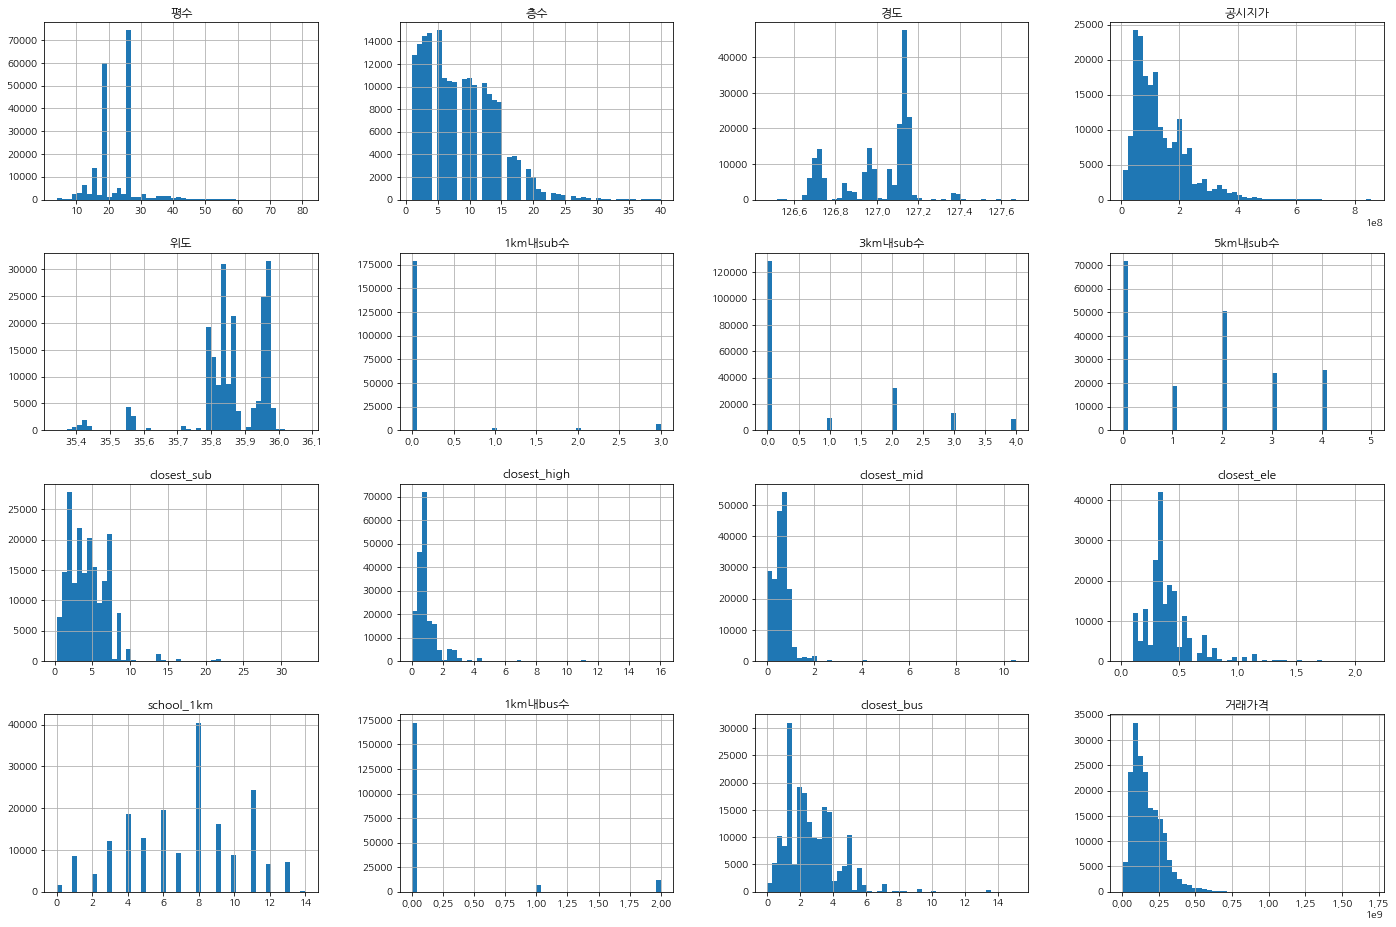

In [162]:
train_data.hist(bins=50, figsize=(24,16))
plt.rc('font', family='NanumGothic')

<Axes: >

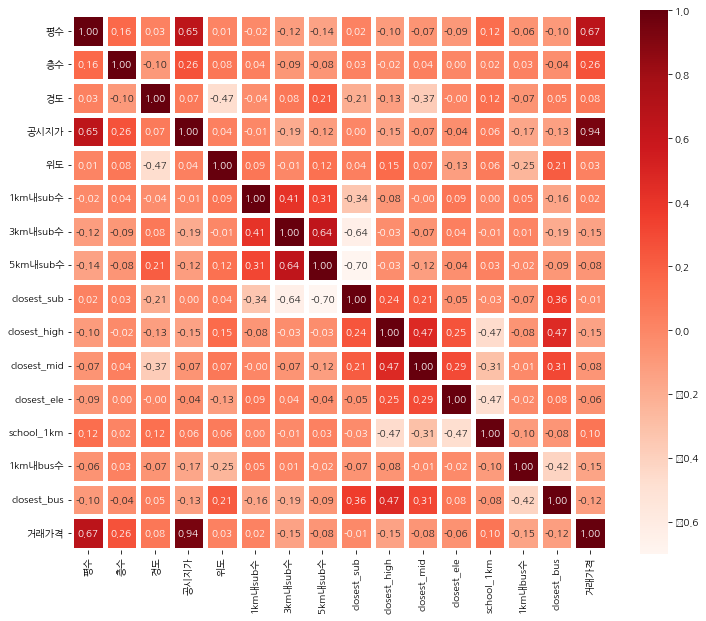

In [150]:
plt.figure(figsize=(12,10))
sns.heatmap(train_data.corr(),annot=True,square=True,fmt='.2f',linewidths=5,cmap='Reds')

In [182]:
X = main_withoutPrice.drop(['1km내sub수', '5km내sub수'], axis=1)
y = main_withPrice['거래가격']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
train_data = x_train.join(y_train)
train_data

,평수,층수,경도,공시지가,위도,3km내sub수,closest_sub,closest_high,closest_mid,closest_ele,school_1km,1km내bus수,closest_bus,거래가격
129548,18.0,4,127.156862,138000000.0,35.832006,2.0,2.033884,0.828795,0.469476,0.401293,11.0,0.0,2.207127,183000000
270983,26.0,15,126.738054,172000000.0,35.971973,0.0,3.609122,0.991322,0.991322,0.595186,5.0,0.0,1.361653,265000000
204376,26.0,10,127.156862,120000000.0,35.832006,2.0,2.033884,0.828795,0.469476,0.401293,11.0,0.0,2.207127,163000000
313113,18.0,6,127.120501,70800000.0,35.797273,0.0,6.931814,0.871456,0.116952,0.306466,13.0,0.0,3.546904,116000000
332795,18.0,6,126.747600,55600000.0,35.982795,1.0,2.133441,1.126441,1.126441,0.599856,1.0,0.0,2.146134,76500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98518,24.0,2,127.371398,47400000.0,35.409585,2.0,0.927199,0.197150,0.917382,0.766915,6.0,0.0,1.497008,78600000
222505,26.0,8,126.865989,176000000.0,35.561380,2.0,2.660422,0.524423,0.858602,0.272151,8.0,0.0,2.257717,242000000
158102,23.0,6,127.131136,104000000.0,35.788197,0.0,7.392472,0.777563,0.596077,0.307127,8.0,0.0,4.925889,162000000
359510,30.0,7,127.156862,158000000.0,35.832006,2.0,2.033884,0.828795,0.469476,0.401293,11.0,0.0,2.207127,231000000


In [183]:
train_data['층수+'] = train_data['층수']+2
train_data.drop('층수', axis=1, inplace=True)

In [184]:
from scipy.stats import boxcox
train_data[['평수']] = train_data[['평수']].apply(lambda x: boxcox(x)[0])
train_data[['closest_bus']] = np.sqrt(train_data[['closest_bus']])
train_data[['거래가격','층수+', '공시지가', 'closest_sub', 'closest_high', 'closest_ele', 'closest_mid']] = np.log(train_data[['거래가격','층수+', '공시지가', 'closest_sub', 'closest_high', 'closest_ele', 'closest_mid']])

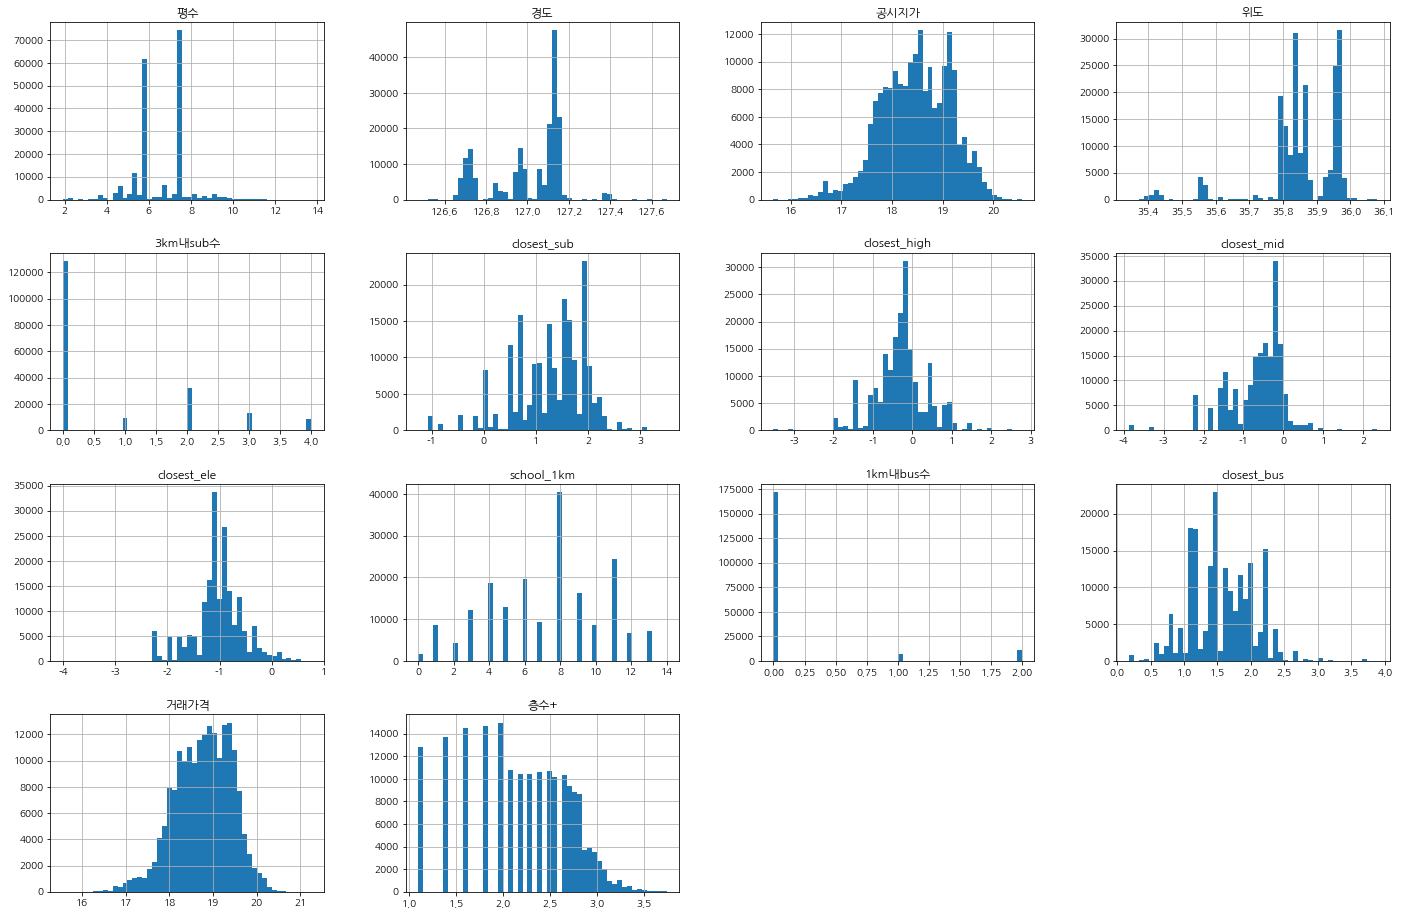

In [185]:
train_data.hist(bins=50, figsize=(24, 16))
plt.rc('font', family='NanumGothic')
plt.rc("axes", unicode_minus = False)

In [186]:
x_train, y_train = train_data.drop(['거래가격'], axis=1), train_data['거래가격']

In [187]:
valid_data = x_valid.join(y_valid)

valid_data['층수+'] = valid_data['층수']+2
valid_data.drop('층수', axis=1, inplace=True)

from scipy.stats import boxcox
valid_data[['평수']] = valid_data[['평수']].apply(lambda x: boxcox(x)[0])
valid_data[['closest_bus']] = np.sqrt(valid_data[['closest_bus']])
valid_data[['거래가격', '층수+', '공시지가', 'closest_sub', 'closest_high', 'closest_ele', 'closest_mid']] = np.log(valid_data[['거래가격','층수+', '공시지가', 'closest_sub', 'closest_high', 'closest_ele', 'closest_mid']])

x_valid, y_valid = valid_data.drop(['거래가격'], axis=1), valid_data['거래가격']

In [188]:
test_data = X_test.join(y_test)

test_data['층수+'] = test_data['층수']+2
test_data.drop('층수', axis=1, inplace=True)

from scipy.stats import boxcox
test_data[['평수']] = test_data[['평수']].apply(lambda x: boxcox(x)[0])
test_data[['closest_bus']] = np.sqrt(test_data[['closest_bus']])
test_data[['거래가격','층수+', '공시지가', 'closest_sub', 'closest_high', 'closest_ele', 'closest_mid']] = np.log(test_data[['거래가격','층수+', '공시지가', 'closest_sub', 'closest_high', 'closest_ele', 'closest_mid']])

X_test, y_test = test_data.drop(['거래가격'], axis=1), test_data['거래가격']

In [189]:
scaler = MinMaxScaler()

scaler.fit(x_train)
x_train_s = scaler.transform(x_train)
x_valid_s = scaler.transform(x_valid)
X_test_s = scaler.transform(X_test)

In [190]:
# 선형회귀모델
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

linear.fit(x_train_s, y_train)

linear.score(X_test_s, y_test)

0.9296367259205116

In [191]:
y_pred_li = linear.predict(x_train_s)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

lin_R2 = r2_score(y_train, y_pred_li)
lin_mae = mean_absolute_error(y_train, y_pred_li)
print(lin_R2)
print(lin_mae)
print('--------------------')
y_pred_li = linear.predict(x_valid_s)
lin_r2 = r2_score(y_valid, y_pred_li)
lin_mae = mean_absolute_error(y_valid, y_pred_li)
print(lin_R2)
print(lin_mae)

0.9303594592802993
0.12867933699613157
--------------------
0.9303594592802993
0.12892797838220926


In [192]:
# 의사결정나무

from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(x_train_s, y_train)

DecisionTreeRegressor()

In [193]:
tree.score(X_test_s, y_test)

0.9202585609890227

In [194]:
y_pred_tr = tree.predict(x_train_s)

tree_R2 = r2_score(y_train, y_pred_tr)
tree_mae = mean_absolute_error(y_train, y_pred_tr)
print(tree_R2)
print(tree_mae)

0.956593987355513
0.096559919932334


In [195]:
y_pred_tr = tree.predict(x_valid_s)

tree_R2 = r2_score(y_valid, y_pred_tr)
tree_mae = mean_absolute_error(y_valid, y_pred_tr)
print(tree_R2)
print(tree_mae)

0.9468598237467244
0.1098060862839395


In [196]:
# XGBoost 회귀

import xgboost

xgb_model = xgboost.XGBRegressor()
xgb_model.fit(x_train_s, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [197]:
y_pred_xgb = xgb_model.predict(x_train_s)

xgb_R2 = r2_score(y_train, y_pred_xgb)
xgb_mae = mean_absolute_error(y_train, y_pred_xgb)
print(xgb_R2)
print(xgb_mae)

0.9476175357117953
0.11194637124484307


In [198]:
y_pred_xgb = xgb_model.predict(x_valid_s)

xgb_R2 = r2_score(y_valid, y_pred_xgb)
xgb_mae = mean_absolute_error(y_valid, y_pred_xgb)
print(xgb_R2)
print(xgb_mae)

0.9456857902016913
0.11476482082258231


In [199]:
# k-fold 교차검증 선형회귀모델

def display_scores(model, scores):
    print('<<', model, '모델 평가 결과 >>')
    print('평균 RMSE: ', scores.mean())
    print('표준편차: ', scores.std())

from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(linear, x_valid_s, y_valid, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

display_scores('선형회귀', lin_rmse_scores)

<< 선형회귀 모델 평가 결과 >>
평균 RMSE:  0.1710250591992531
표준편차:  0.003272800815159554


In [200]:
# k-fold 교차검증 의사결정나무
tree_scores = cross_val_score(tree, x_valid_s, y_valid, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)
display_scores('의사결정나무', tree_rmse_scores)

<< 의사결정나무 모델 평가 결과 >>
평균 RMSE:  0.17225786845329805
표준편차:  0.0017371695908718384


In [204]:
# k-fold 교차검증 XGBoost
xgb_model_scores = cross_val_score(xgb_model, x_valid_s, y_valid, scoring='neg_mean_squared_error', cv=10)
xgb_model_rmse_scores = np.sqrt(-xgb_model_scores)
display_scores('XGBoost', xgb_model_rmse_scores)

<< XGBoost 모델 평가 결과 >>
평균 RMSE:  0.15413657441781145
표준편차:  0.002263089721829125


In [201]:
# 최종모델의 성능평가 선형회귀모델

#x_test_nor = scaler.transform(X_test)
final_pred_li = linear.predict(X_test_s)

from sklearn.metrics import mean_squared_error
final_mse_li = mean_squared_error(y_test, final_pred_li)
final_rmse_li = np.sqrt(final_mse_li)
final_r2_li = r2_score(y_test, final_pred_li)

print('RMSE: ', final_rmse_li)
print('R2: ', final_r2_li)

RMSE:  0.17192708783986388
R2:  0.9296367259205116


In [202]:
# 최종모델의 성능평가 의사결정나무

#x_test_nor = scaler.transform(X_test)
final_pred_tree = tree.predict(X_test_s)

from sklearn.metrics import mean_squared_error
final_mse_tree = mean_squared_error(y_test, final_pred_tree)
final_rmse_tree = np.sqrt(final_mse_tree)
final_r2_tree = r2_score(y_test, final_pred_tree)

print('RMSE: ', final_rmse_tree)
print('R2: ', final_r2_tree)

RMSE:  0.1830262247193892
R2:  0.9202585609890227


In [203]:
# 최종모델의 성능평가 XGBoost

#x_test_nor = scaler.transform(X_test)
final_pred_xgb_model = xgb_model.predict(X_test_s)

from sklearn.metrics import mean_squared_error
final_mse_xgb_model = mean_squared_error(y_test, final_pred_xgb_model)
final_rmse_xgb_model = np.sqrt(final_mse_xgb_model)
final_r2_xgb_model = r2_score(y_test, final_pred_xgb_model)

print('RMSE: ', final_rmse_xgb_model)
print('R2: ', final_r2_xgb_model)

RMSE:  0.1648857900350962
R2:  0.9352821793136695


In [205]:
# 예측값과 실제값의 비교 - 시각화

pred_li = pd.DataFrame(final_pred_li, columns=['예측가격'])
actual_li = pd.DataFrame(y_test)
actual_li.reset_index(inplace=True, drop=True)
table_li = pd.concat([pred_li, actual_li], axis=1)

table_li['실제거래가격'] = np.exp(table_li['거래가격'])
table_li['실제예측가격'] = np.exp(table_li['예측가격'])
table_li['오차율'] = (table_li['거래가격'] - table_li['예측가격']) / table_li['거래가격'] * 100
table_li['실제오차율'] = (table_li['실제거래가격'] - table_li['실제예측가격']) / table_li['실제거래가격'] * 100
table_li.describe()

,예측가격,거래가격,실제거래가격,실제예측가격,오차율,실제오차율
count,59725.000000,59725.000000,5.972500e+04,5.972500e+04,59725.000000,59725.000000
mean,18.769525,18.776740,1.732188e+08,1.699377e+08,0.029575,-0.838423
std,0.623371,0.648149,1.076223e+08,1.022465e+08,0.925418,19.245886
min,16.220186,15.761421,7.000000e+06,1.107484e+07,-8.395162,-310.141079
25%,18.317583,18.315320,9.000000e+07,9.020384e+07,-0.466335,-9.133560
50%,18.794818,18.826146,1.500000e+08,1.453737e+08,0.064013,1.193318
75%,19.283998,19.275096,2.350000e+08,2.371013e+08,0.621016,11.011014
max,20.772347,21.253894,1.700000e+09,1.050305e+09,4.979816,61.272471


Text(0.5, 1.0, '선형회귀분석 실제오차율 분포')

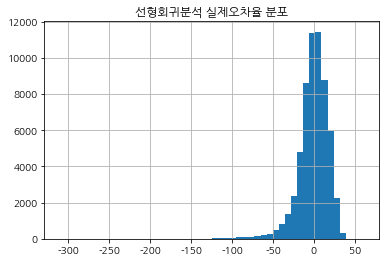

In [206]:
table_li['실제오차율'].hist(bins=50)
plt.rc("axes", unicode_minus = False)
plt.title('선형회귀분석 실제오차율 분포')

<Axes: >

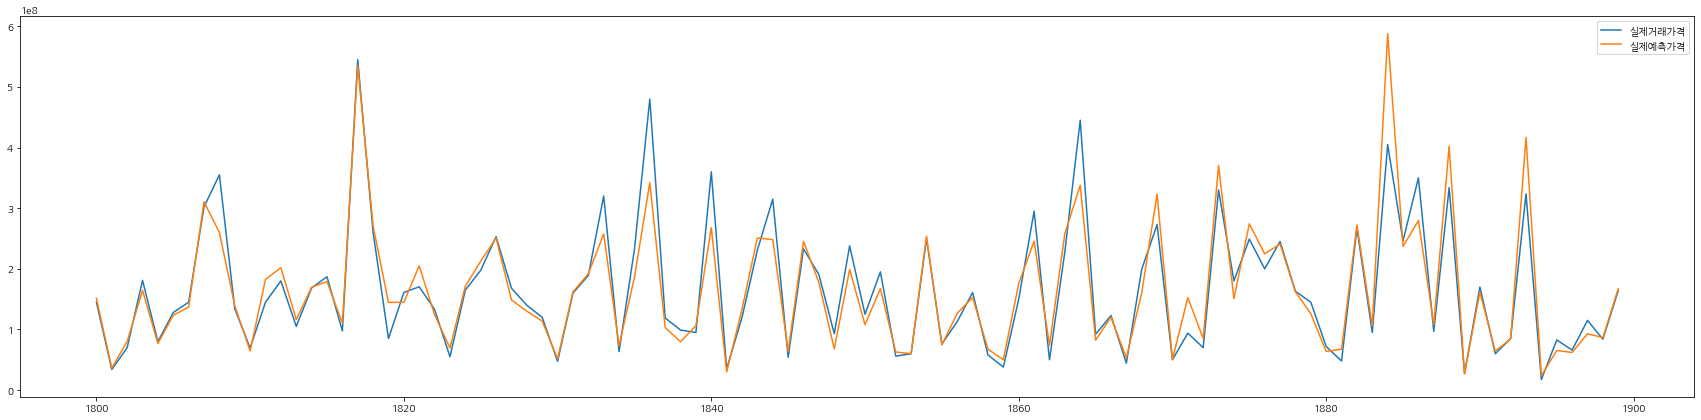

In [207]:
# 선형회귀분석 예측 정확도 시각화

real_li = table_li[['실제거래가격', '실제예측가격']]
plt.rc('font', family='NanumGothic')
real_li.iloc[1800:1900, :].plot(figsize=(30,7))

<Axes: >

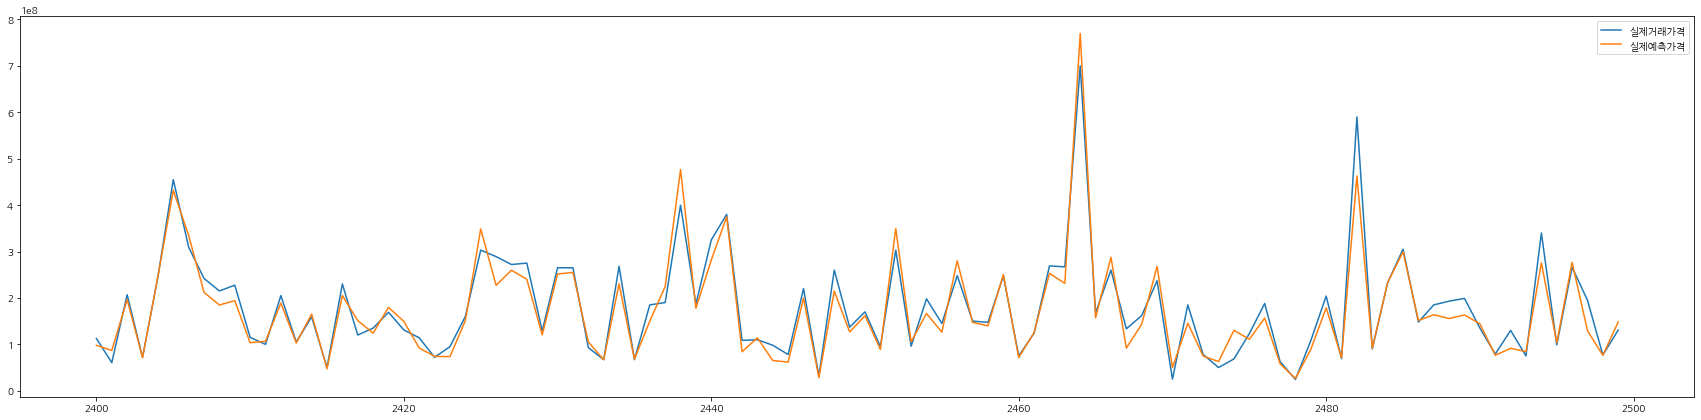

In [208]:
plt.rc('font', family='NanumGothic')
real_li.iloc[2400:2500, :].plot(figsize=(30,7))

<Axes: >

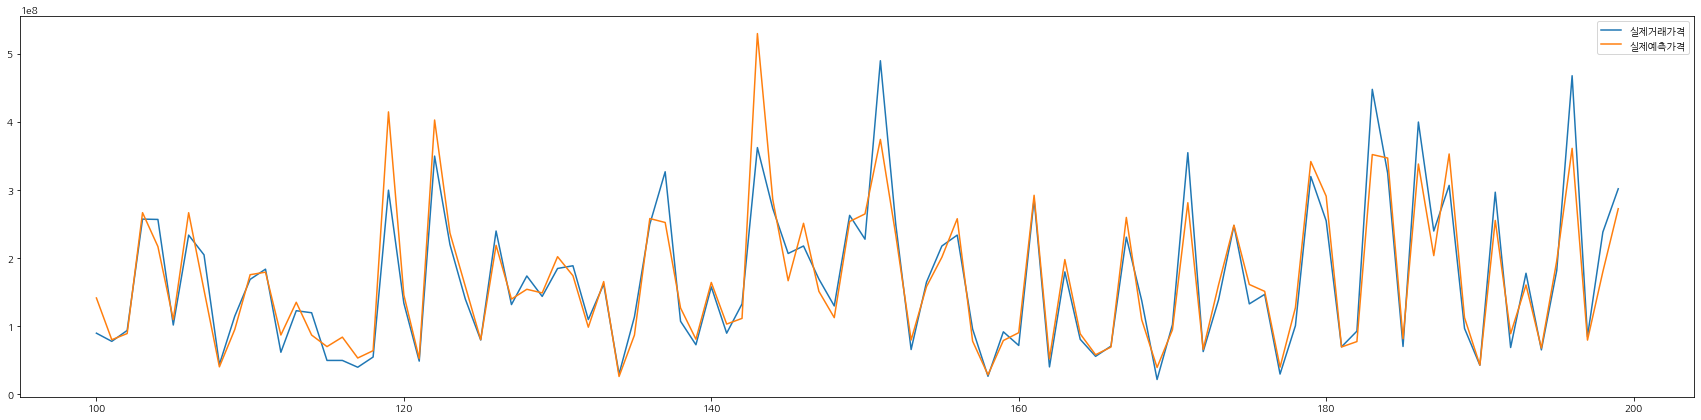

In [209]:
plt.rc('font', family='NanumGothic')
real_li.iloc[100:200, :].plot(figsize=(30,7))

In [210]:
error_li = table_li[(table_li['실제오차율']>=10)|(table_li['실제오차율']<=-10)]
error_li_only = error_li[['실제거래가격', '실제예측가격']]
error_li.describe()

,예측가격,거래가격,실제거래가격,실제예측가격,오차율,실제오차율
count,30348.000000,30348.000000,3.034800e+04,3.034800e+04,30348.000000,30348.000000
mean,18.773852,18.783277,1.795295e+08,1.736750e+08,0.033127,-1.975288
std,0.650670,0.697057,1.196954e+08,1.098994e+08,1.264526,26.386186
min,16.220186,15.761421,7.000000e+06,1.107484e+07,-8.395162,-310.141079
25%,18.310859,18.315320,9.000000e+07,8.959941e+07,-0.870542,-17.530959
50%,18.768682,18.826146,1.500000e+08,1.416234e+08,0.610772,10.823725
75%,19.308717,19.316769,2.450000e+08,2.430353e+08,1.029678,17.735112
max,20.712850,21.253894,1.700000e+09,9.896380e+08,4.979816,61.272471


<Axes: >

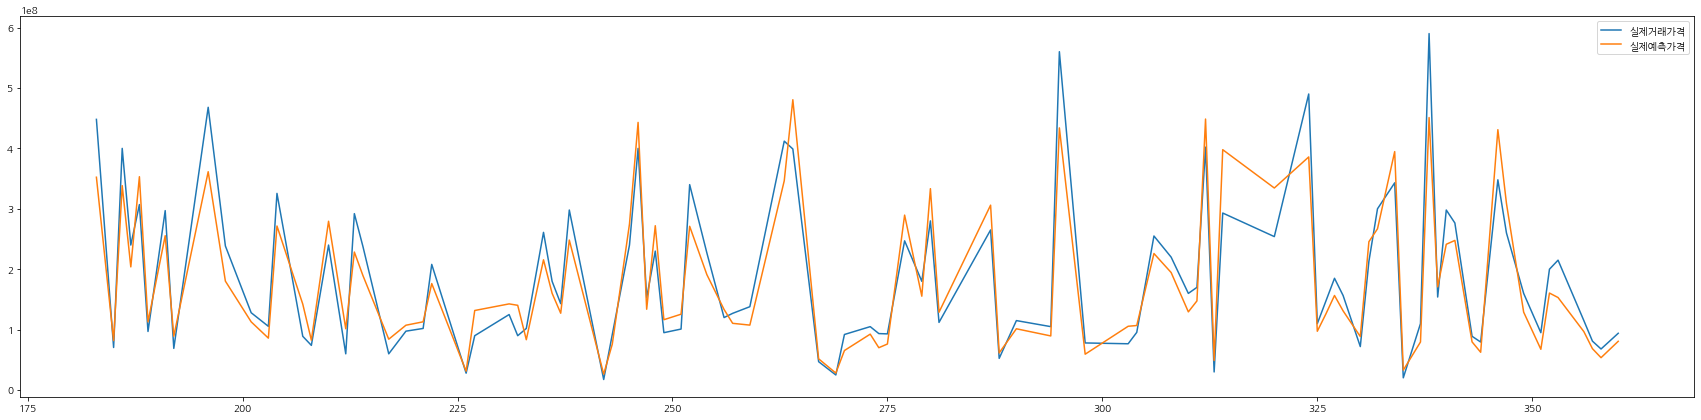

In [211]:
plt.rc('font', family='NanumGothic')
error_li_only.iloc[100:200, :].plot(figsize=(30,7))

In [212]:
# 예측값과 실제값의 비교 - 의사결정나무

pred_tree = pd.DataFrame(final_pred_tree, columns=['예측가격'])
actual_tree = pd.DataFrame(y_test)
actual_tree.reset_index(inplace=True, drop=True)
table_tree = pd.concat([pred_tree, actual_tree], axis=1)

table_tree['실제거래가격'] = np.exp(table_tree['거래가격'])
table_tree['실제예측가격'] = np.exp(table_tree['예측가격'])
table_tree['오차율'] = (table_tree['거래가격'] - table_tree['예측가격']) / table_tree['거래가격'] * 100
table_tree['실제오차율'] = (table_tree['실제거래가격'] - table_tree['실제예측가격']) / table_tree['실제거래가격'] * 100
table_tree.describe()

,예측가격,거래가격,실제거래가격,실제예측가격,오차율,실제오차율
count,59725.000000,59725.000000,5.972500e+04,5.972500e+04,59725.000000,59725.000000
mean,18.764931,18.776740,1.732188e+08,1.705358e+08,0.057001,-0.452425
std,0.642028,0.648149,1.076223e+08,1.036285e+08,0.978318,18.269997
min,15.783262,15.761421,7.000000e+06,7.154574e+06,-9.453407,-390.000000
25%,18.324567,18.315320,9.000000e+07,9.083603e+07,-0.494111,-9.678747
50%,18.795040,18.826146,1.500000e+08,1.454059e+08,-0.000293,-0.005327
75%,19.304262,19.275096,2.350000e+08,2.419549e+08,0.521670,9.326754
max,21.253894,21.253894,1.700000e+09,1.700000e+09,5.374030,63.668156


Text(0.5, 1.0, '의사결정나무 실제오차율 분포')

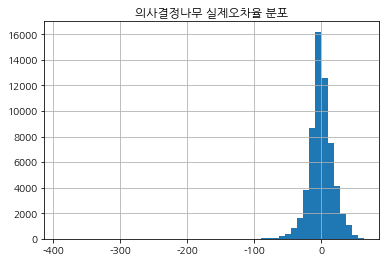

In [213]:
table_tree['실제오차율'].hist(bins=50)
plt.rc("axes", unicode_minus = False)
plt.title('의사결정나무 실제오차율 분포')

<Axes: >

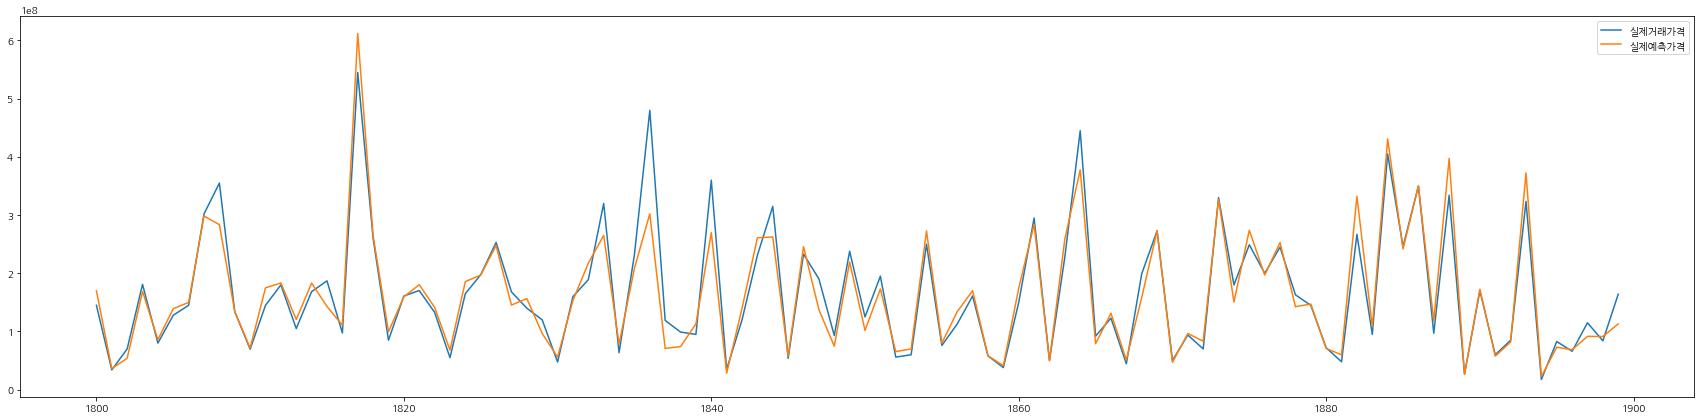

In [214]:
# 의사결정나무 예측 정확도 시각화

table_tree_only = table_tree[['실제거래가격', '실제예측가격']]
plt.rc('font', family='NanumGothic')
table_tree_only.iloc[1800:1900, :].plot(figsize=(30,7))

<Axes: >

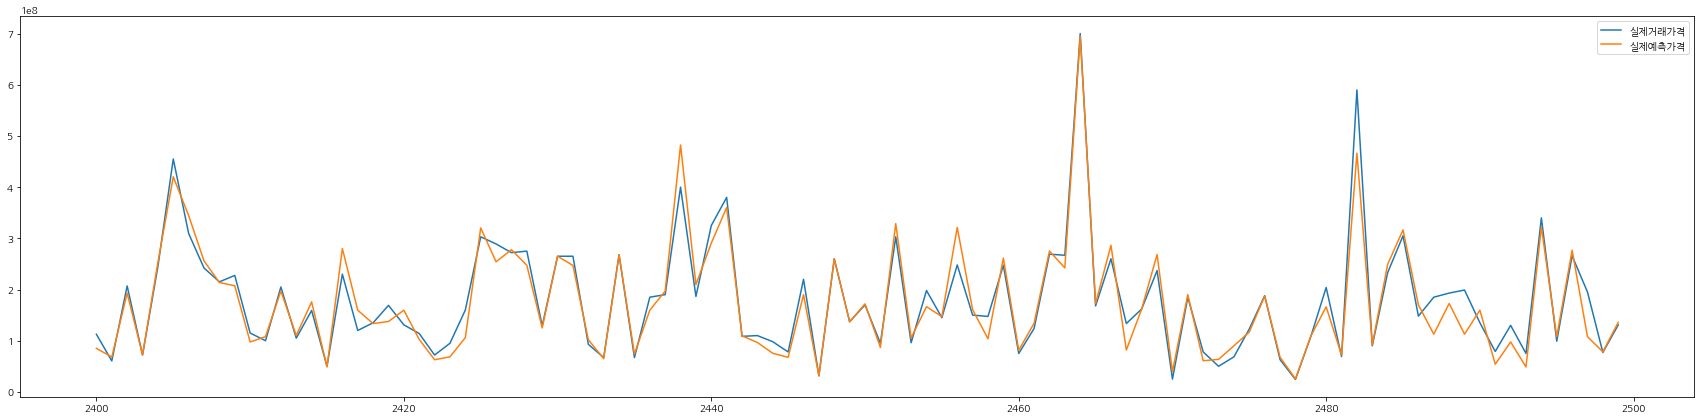

In [215]:
plt.rc('font', family='NanumGothic')
table_tree_only.iloc[2400:2500, :].plot(figsize=(30,7))

<Axes: >

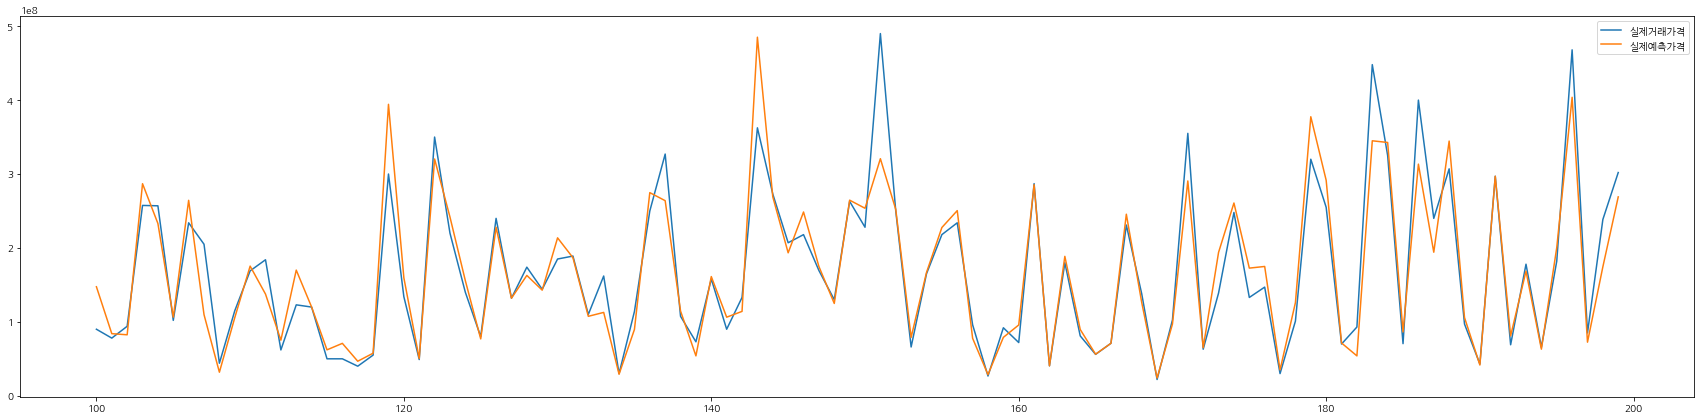

In [216]:
plt.rc('font', family='NanumGothic')
table_tree_only.iloc[100:200, :].plot(figsize=(30,7))

In [217]:
error_tree = table_tree[(table_tree['실제오차율']>=10)|(table_tree['실제오차율']<=-10)]
error_tree_only = error_tree[['실제거래가격', '실제예측가격']]
error_tree.describe()

,예측가격,거래가격,실제거래가격,실제예측가격,오차율,실제오차율
count,28795.000000,28795.000000,2.879500e+04,2.879500e+04,28795.000000,28795.000000
mean,18.743667,18.769985,1.755145e+08,1.695135e+08,0.128101,-0.607277
std,0.665409,0.679603,1.151233e+08,1.071960e+08,1.375078,25.741794
min,16.187977,16.012735,9.000000e+06,1.072381e+07,-9.453407,-390.000000
25%,18.298009,18.309749,8.950000e+07,8.845538e+07,-0.884635,-17.967175
50%,18.739534,18.792244,1.450000e+08,1.375549e+08,-0.509317,-10.123309
75%,19.317001,19.275096,2.350000e+08,2.450568e+08,1.107456,18.982774
max,20.977908,20.854294,1.140000e+09,1.290000e+09,5.374030,63.668156


<Axes: >

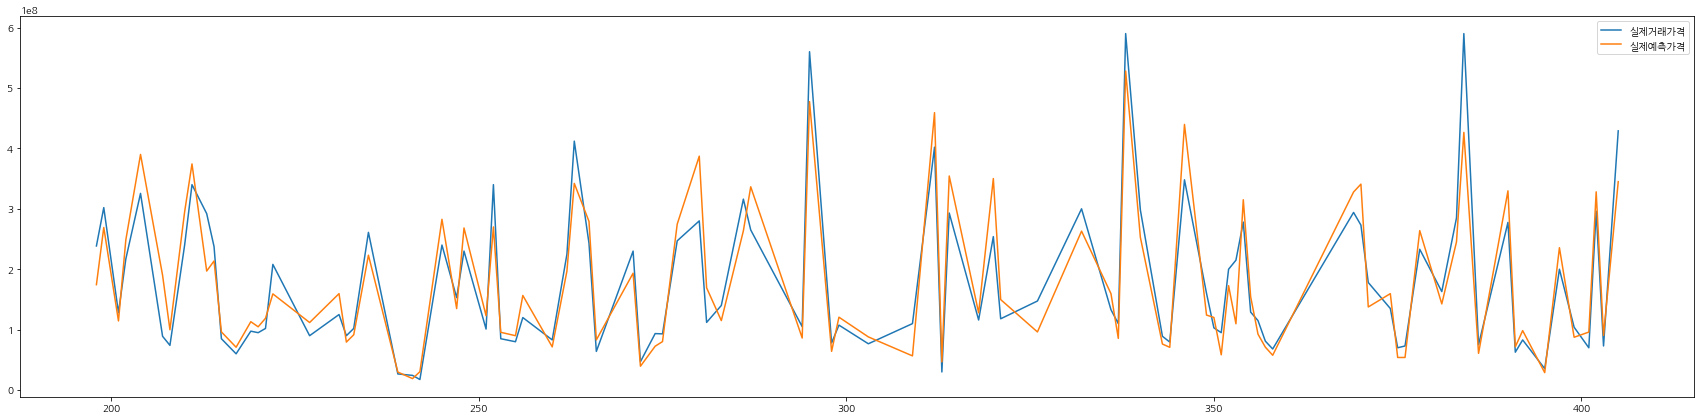

In [218]:
plt.rc('font', family='NanumGothic')
error_tree_only.iloc[100:200, :].plot(figsize=(30,7))

In [219]:
# 예측값과 실제값의 비교 - 시각화

pred_xgb_model = pd.DataFrame(final_pred_xgb_model, columns=['예측가격'])
actual_xgb_model = pd.DataFrame(y_test)
actual_xgb_model.reset_index(inplace=True, drop=True)
table_xgb_model = pd.concat([pred_xgb_model, actual_xgb_model], axis=1)

table_xgb_model['실제거래가격'] = np.exp(table_xgb_model['거래가격'])
table_xgb_model['실제예측가격'] = np.exp(table_xgb_model['예측가격'])
table_xgb_model['오차율'] = (table_xgb_model['거래가격'] - table_xgb_model['예측가격']) / table_xgb_model['거래가격'] * 100
table_xgb_model['실제오차율'] = (table_xgb_model['실제거래가격'] - table_xgb_model['실제예측가격']) / table_xgb_model['실제거래가격'] * 100
table_xgb_model.describe()

,예측가격,거래가격,실제거래가격,실제예측가격,오차율,실제오차율
count,59725.000000,59725.000000,5.972500e+04,5.972500e+04,59725.000000,59725.000000
mean,18.753199,18.776740,1.732188e+08,1.675580e+08,0.118665,1.028421
std,0.631943,0.648149,1.076223e+08,9.927743e+07,0.873825,16.190773
min,15.820635,15.761421,7.000000e+06,7.427017e+06,-6.669905,-212.299785
25%,18.313910,18.315320,9.000000e+07,8.987313e+07,-0.420168,-8.193327
50%,18.768820,18.826146,1.500000e+08,1.416429e+08,0.043077,0.812069
75%,19.305273,19.275096,2.350000e+08,2.421997e+08,0.628132,11.121669
max,21.101458,21.253894,1.700000e+09,1.459643e+09,5.054561,61.819981


Text(0.5, 1.0, 'XGBoost 실제오차율 분포')

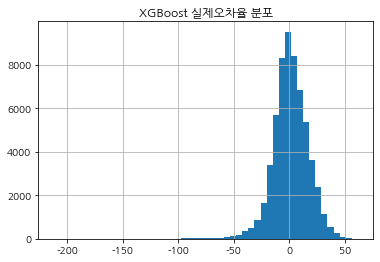

In [220]:
table_xgb_model['실제오차율'].hist(bins=50)
plt.rc("axes", unicode_minus = False)
plt.title('XGBoost 실제오차율 분포')

<Axes: >

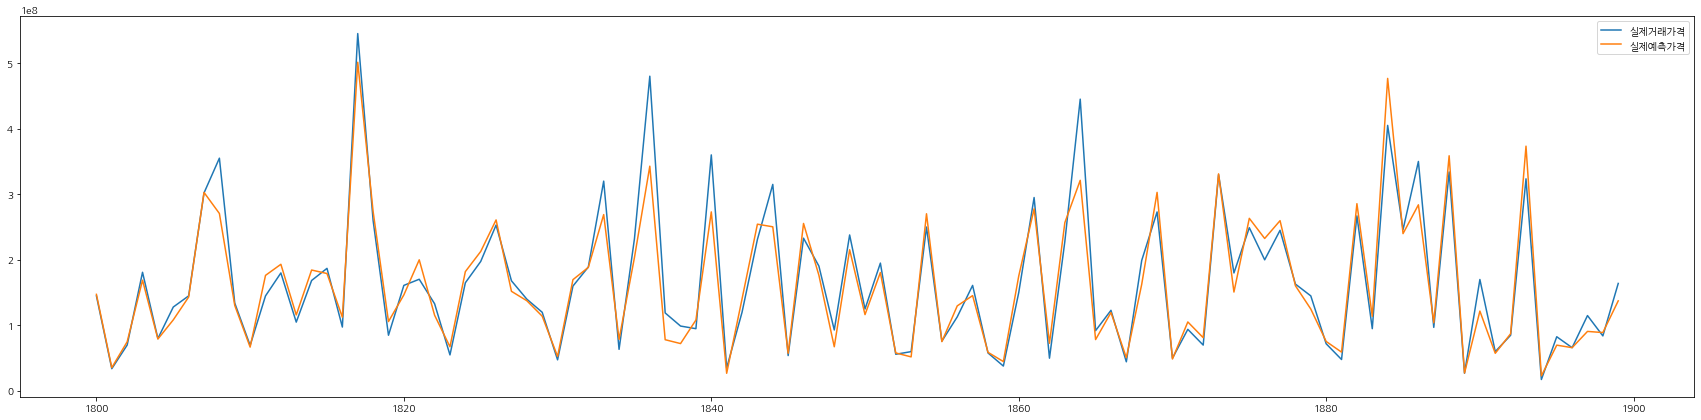

In [221]:
real_xgb_model = table_xgb_model[['실제거래가격', '실제예측가격']]
plt.rc('font', family='NanumGothic')
real_xgb_model.iloc[1800:1900, :].plot(figsize=(30,7))

In [222]:
error_xgb_model = table_xgb_model[(table_xgb_model['실제오차율']>=10)|(table_xgb_model['실제오차율']<=-10)]
error_xgb_model_only = error_xgb_model[['실제거래가격', '실제예측가격']]
error_xgb_model.describe()

,예측가격,거래가격,실제거래가격,실제예측가격,오차율,실제오차율
count,28839.000000,28839.000000,2.883900e+04,2.883900e+04,28839.000000,28839.000000
mean,18.726398,18.775171,1.773845e+08,1.652900e+08,0.245726,2.295275
std,0.649016,0.685524,1.197616e+08,1.033093e+08,1.207085,22.521541
min,16.254023,16.012735,9.000000e+06,1.145598e+07,-6.669905,-212.299785
25%,18.282061,18.315320,9.000000e+07,8.705587e+07,-0.758760,-15.227427
50%,18.705173,18.819457,1.490000e+08,1.329088e+08,0.654944,11.579065
75%,19.291292,19.253590,2.300000e+08,2.388371e+08,1.122134,19.136384
max,21.101458,21.253894,1.700000e+09,1.459643e+09,5.054561,61.819981


<Axes: >

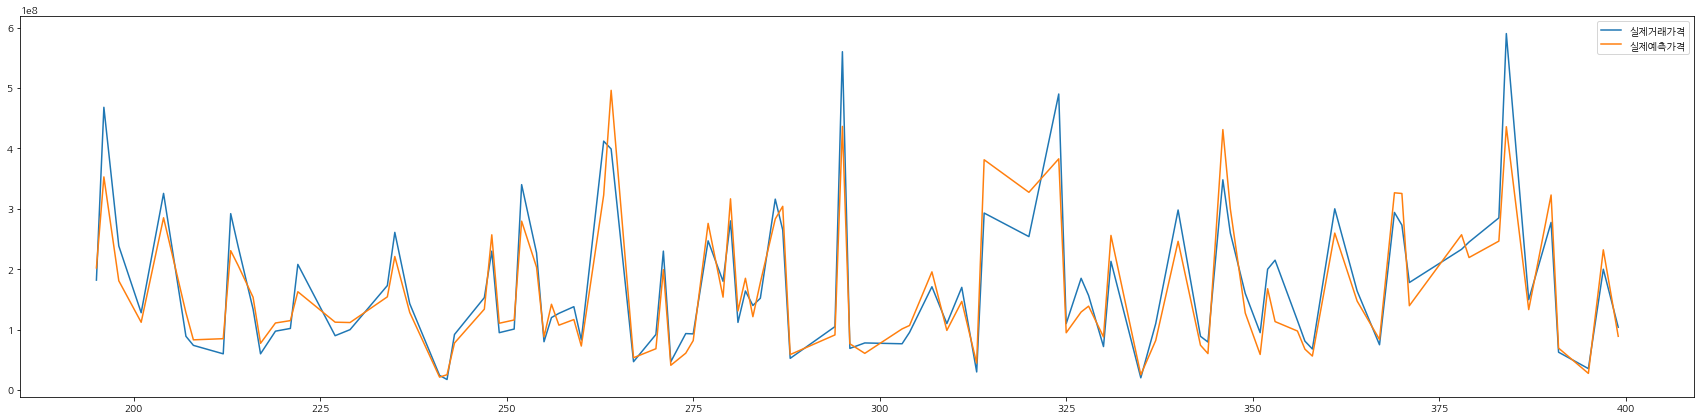

In [223]:
plt.rc('font', family='NanumGothic')
error_xgb_model_only.iloc[100:200, :].plot(figsize=(30,7))